# Multiple Linear Regression in Python


A real-life situation that would be useful in understanding customer behavior is to understand how customer details affect bandwidth usage. Being able to understand this relationship and being able to anticipate a certain level of bandwidth usage will help the company give the customers a good experience.

**Research Question:** Given this dataset, can we predict bandwidth usage using linear regression?
 
By implementing multiple regression for predictive modeling, we can gain valuable insights into customer behavior and leverage these insights to optimize services, allocate resources effectively, and provide a superior customer experience.

*This does not include the findings listed in the research paper.  It is primarily data and analysis.*

### The version of the notebook server is: 6.4.12
### The server is running on this version of Python: Python 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


In [1]:
import matplotlib as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statistics 
import numpy as np
import pandas as pd
import seaborn as sns
 

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


import warnings
warnings.filterwarnings('ignore') 


In [2]:
churndata = pd.read_csv('MLR_Input.csv')

In [3]:
churndata.shape

(10000, 50)

## Look for duplicates

In [4]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

## No duplicates found

In [5]:
churndata.duplicated().value_counts()

False    10000
dtype: int64

## Look for duplicates without the first 2 columns(those are unique)

In [6]:
churndata.duplicated().value_counts()

False    10000
dtype: int64

### There are absolutely NO duplicates


## Detection of Missing Data

### Listing of null data in the table

In [7]:
churndata.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho


The two methods of treating missing data are deletion and imputatuion.  

## Dealing with missing data

I created the NULLsubset so that we can specifically look at the data in only the fields with NULL data.

In [8]:
NULLsubset = churndata[[ 'Techie', 'Phone', 'Tenure', 'Bandwidth_GB_Year', 'Children', 'TechSupport', 'Age', 'Income' ]]

In [9]:
NULLsubset.isnull().sum()

Techie               0
Phone                0
Tenure               0
Bandwidth_GB_Year    0
Children             0
TechSupport          0
Age                  0
Income               0
dtype: int64

### Histograms of the NULL data 

array([[<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Bandwidth_GB_Year'}>],
       [<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>, <Axes: >]], dtype=object)

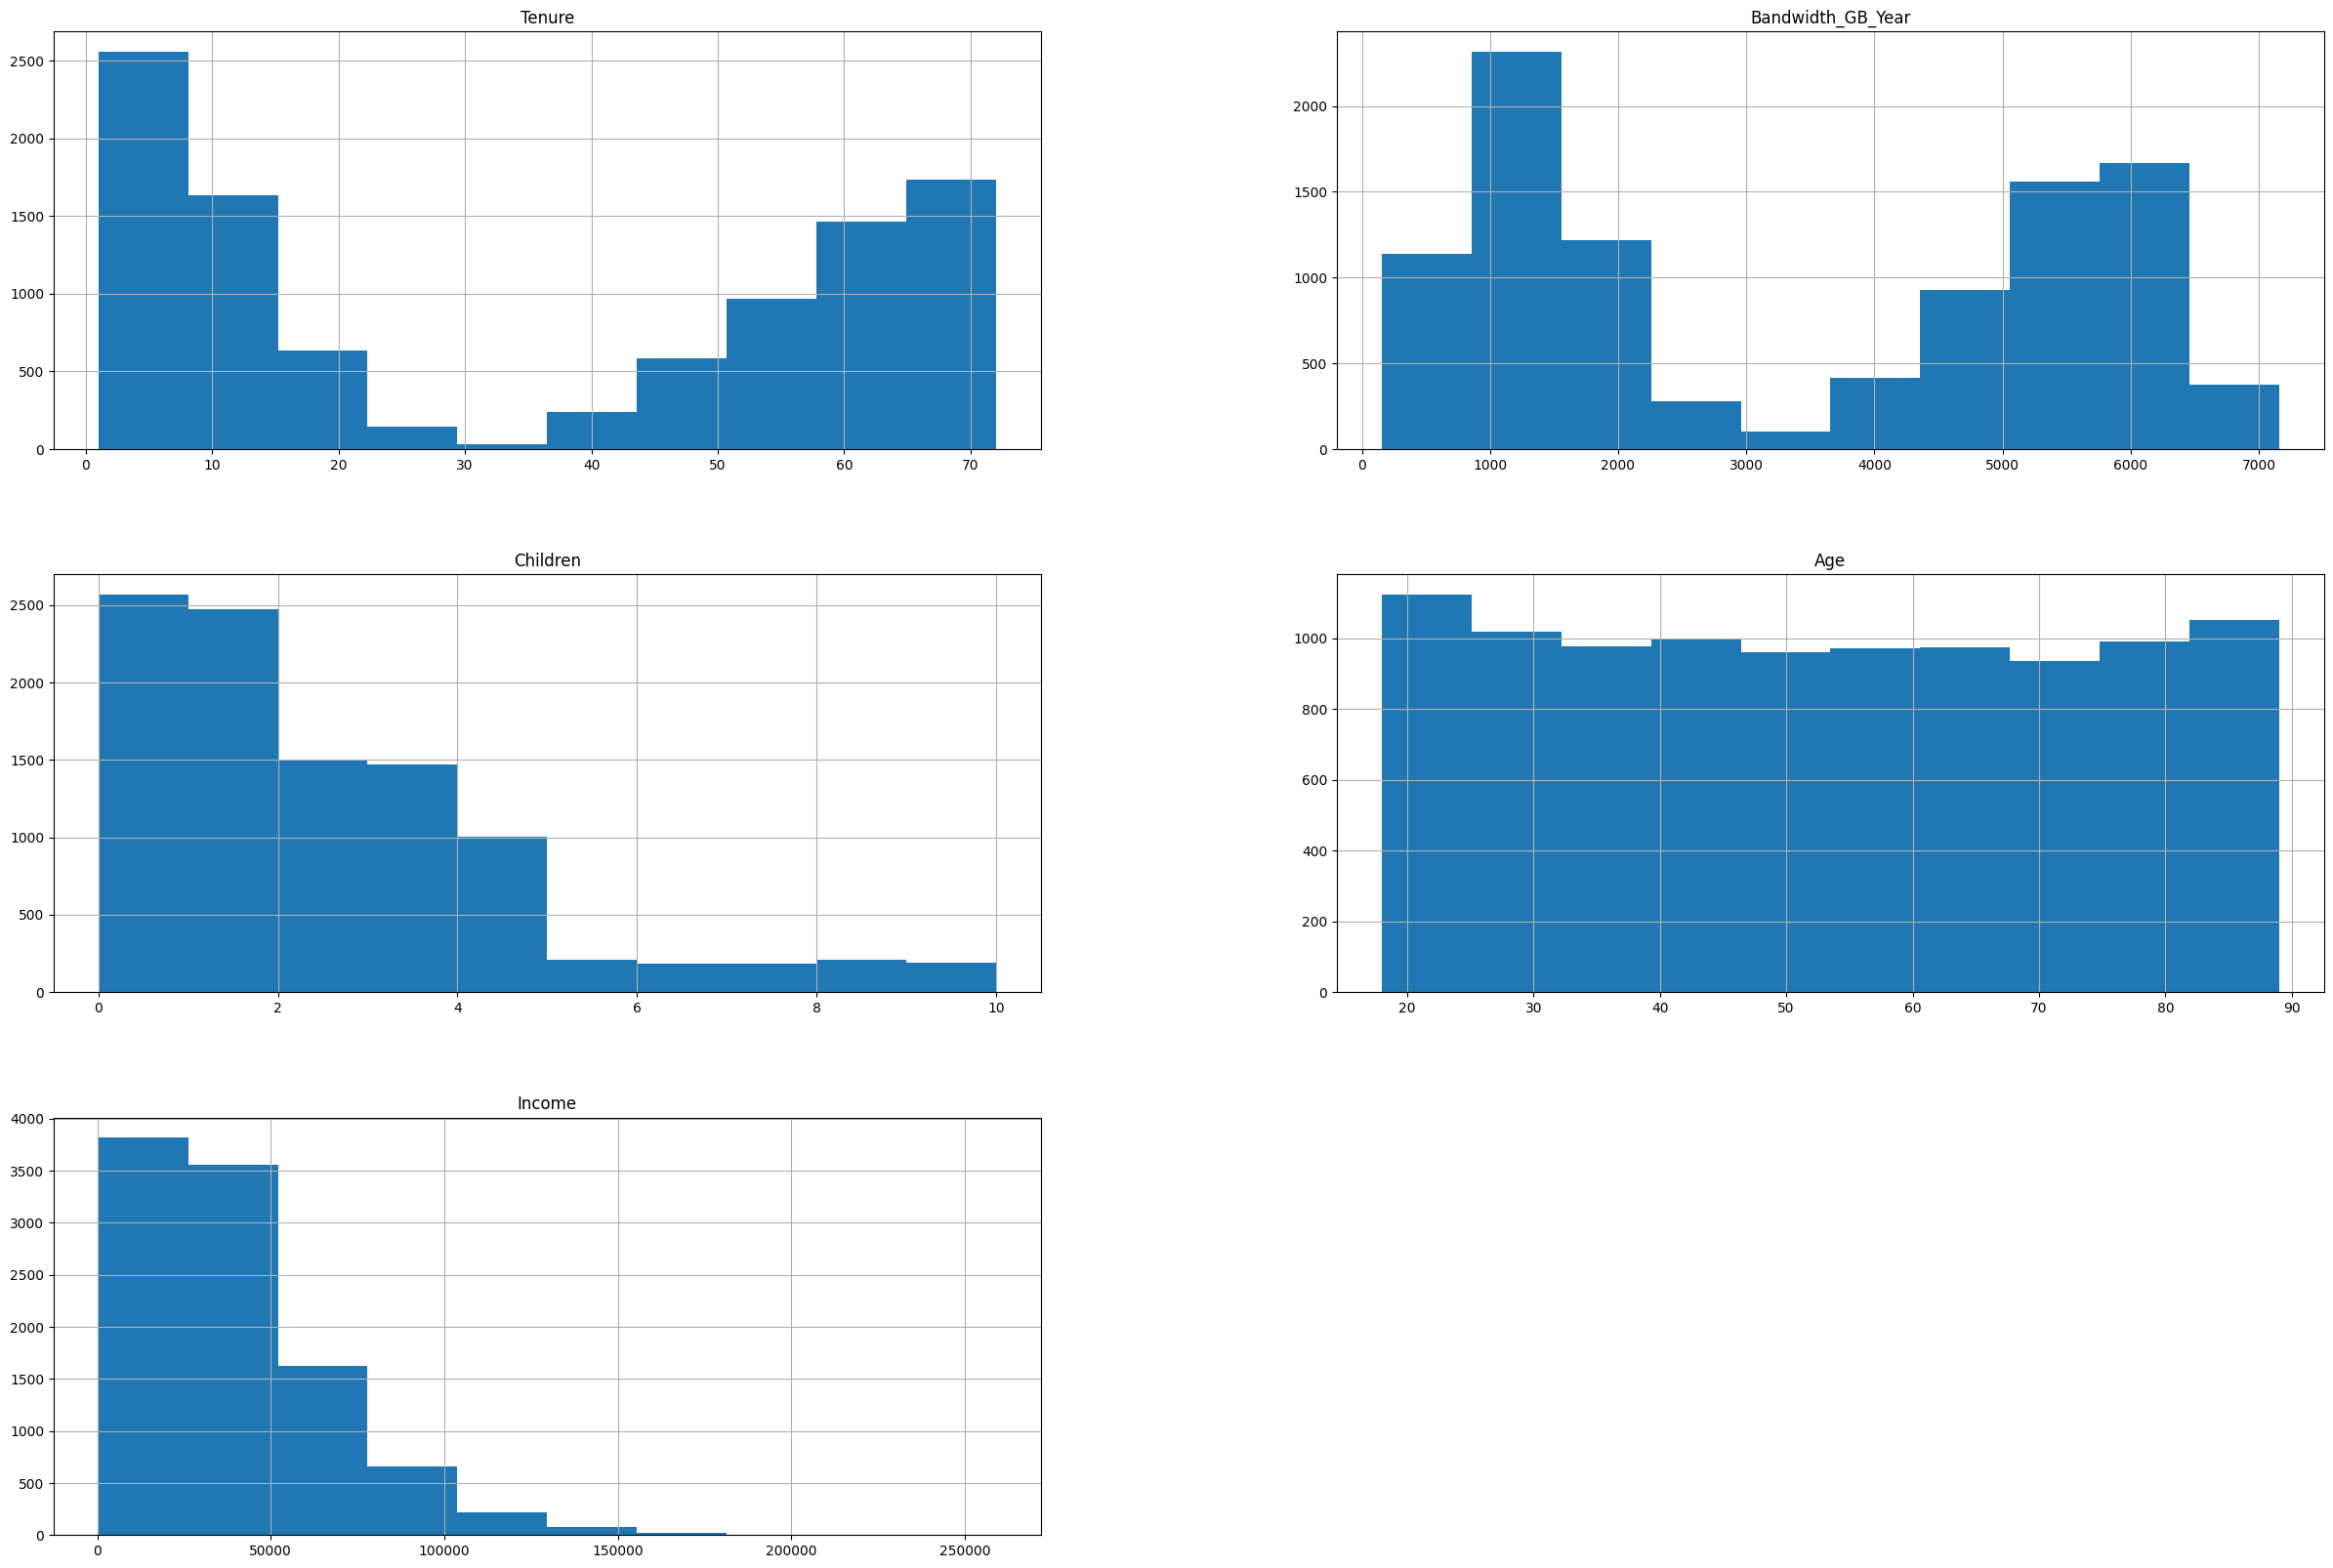

In [10]:
NULLsubset.hist(bins = 10, figsize=(30,20))

<Axes: >

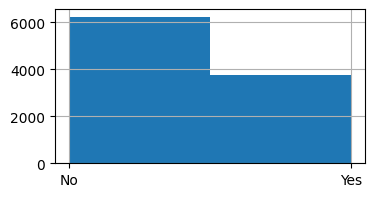

In [11]:
NULLsubset['TechSupport'].hist(bins = 2, figsize=(4,2))

<Axes: >

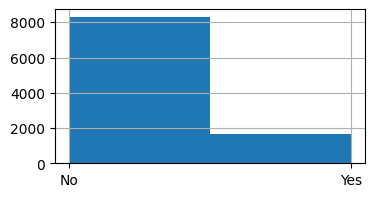

In [12]:
NULLsubset['Techie'].hist(bins = 2, figsize=(4,2))

<Axes: >

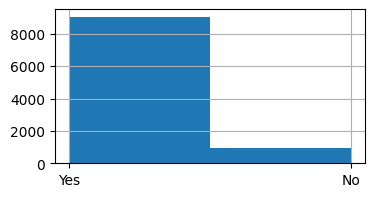

In [13]:
NULLsubset['Phone'].hist(bins = 2, figsize=(4,2))

### Basic information from the columns with NULL data.  The Phone and Techie columns will be dealt with later.  

In [14]:
NULLsubset.describe()

,Tenure,Bandwidth_GB_Year,Children,Age,Income
count,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000
mean,34.526188,3392.341550,2.0877,53.078400,39806.926771
std,26.443063,2185.294852,2.1472,20.698882,28199.916702
min,1.000259,155.506715,0.0000,18.000000,348.670000
25%,7.917694,1236.470827,0.0000,35.000000,19224.717500
50%,35.430507,3279.536903,1.0000,53.000000,33170.605000
75%,61.479795,5586.141370,3.0000,71.000000,53246.170000
max,71.999280,7158.981530,10.0000,89.000000,258900.700000


### Overall interpretations of the graphs and treatment preference


I want to look at the distribution shapes of the seven columns with NULL data and the type of distributuon that each of those graphs has. I will be treating the missing data according to the primary method listed in the lecture based on the inital distribution of the data that contains the missing data.  I will include all of the code and proof that each of the columns with null values were imputed using the prefered treatment method in the sections below.


* The Children graph is positively skewed to the right.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.
* The Age graph has a uniform distribution meaning it is equally spread with no peaks. The Mean will be imputed for the missing  values since it is the prefered method of imputation for graphs with a uniform distribution.
* The Income graph is positively skewed to the right.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.
* The TechSupport graph shows that it is a yes no option and there are NULL values in addition. The prefered imputation method for cateforical data is to use the Mode value when imputing data for the NULL values.
* The Techie graph shows that it is a yes no option and there are NULL values in addition. The prefered imputation method for cateforical data is to use the Mode value when imputing data for the NULL values.
* The Phone graph shows that it is a yes no option and there are NULL values in addition.  The prefered imputation method for cateforical data is to use the Mode value when imputing data for the NULL values.
* The Tenure graph has a bimodal distribution and is non-symetric. The prefered imputation method for the skewed graph is to impute the median value for the NULL values.
* The Bandwidth_GB_Year has a bimodal distribution and is non-symetric.  This graph is a bit more symetric than the Tenure graph.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.





## Treating missing data


I will be treating the missing data according to the primary method listed in the lecture based on the inital distribution of the data that contains the missing data.  

### Children imputation
The Children graph is positively skewed to the right.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.


In [15]:
churndata["Children"].fillna(churndata["Children"].median(), inplace = True)

The median number of Children is 1.  After running the histogram, you can see that there is a spike at 1 that shows that all of the NULL values were replaced with 1.0.

In [16]:
print(churndata["Children"].median())

1.0


<Axes: >

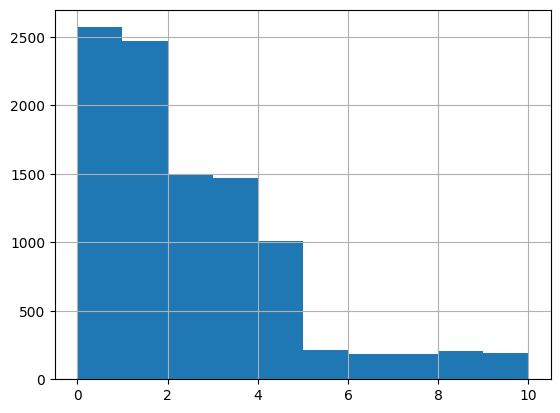

In [17]:
churndata['Children'].hist()

There are no fields in the Children column with NULL values.

In [18]:
churndata['Children'].isnull().sum()

0

### Age imputation

The Age graph has a uniform distribution meaning it is equally spread with no peaks. The Mean will be imputed for the missing  values since it is the prefered method of imputation for graphs with a uniform distribution.   

Since the mean of the Age column is 53.27574750830565, that value will be imputed  for all of the places there are NULL value in that column. To do this, I will use the Fillna function.

In [19]:
churndata["Age"].fillna(churndata["Age"].mean(), inplace = True)

After the Age NULL values were filled with the mean values, there is a difference in the graph with a spike at the Mean value.

<Axes: >

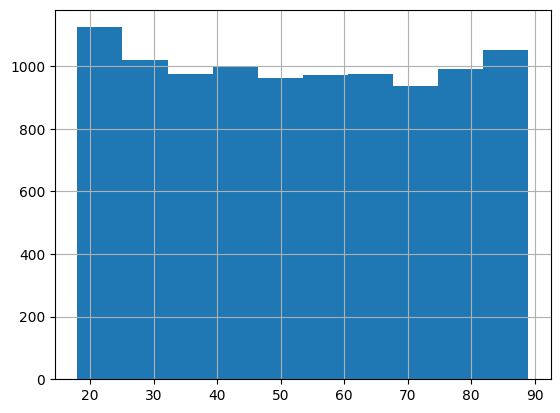

In [20]:
churndata['Age'].hist()

There are no NULL values in the Age column.

In [21]:
churndata['Age'].isnull().sum()

0

The Mean is still 53.275747508309024.

In [22]:
 churndata['Age'].mean()

53.0784

### Income imputation

The Income graph is positively skewed to the right.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.

In [23]:
print(churndata["Income"].median())

33170.604999999996


In [24]:
churndata["Income"].fillna(churndata["Income"].median(), inplace = True)

After the imputation, the graph is still positively skewed, but you can see a spike aroud the median value below 50,000 dollars. After imputation, the median is still $33,186.785 

<Axes: >

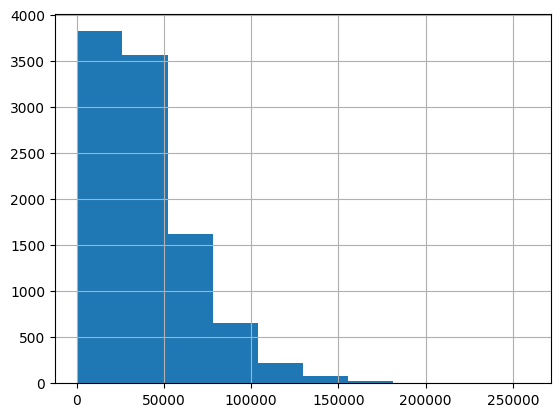

In [25]:
churndata['Income'].hist()

In [26]:
print(churndata["Income"].median())

33170.604999999996


There are no NULL values in the Income column.

In [27]:
churndata['Children'].isnull().sum()

0

### Tenure imputation

The Tenure graph has a bimodal distribution and is non-symetric. The prefered imputation method for the skewed graph is to impute the median value for the NULL values.


In [28]:
print(churndata["Tenure"].median())

35.430506995


In [29]:
churndata["Tenure"].fillna(churndata["Tenure"].median(), inplace = True)

After the imputation, the graph still has a bimodal distribuation that is non-symetric, but now there is a spike at the median value.  You can also see that there are now 0 NULL values in the Tenure column.

<Axes: >

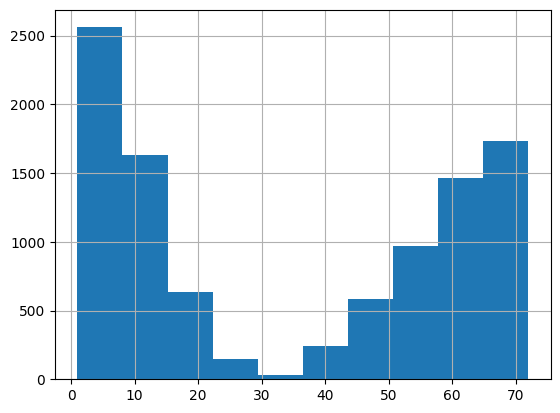

In [30]:
churndata['Tenure'].hist()

In [31]:
churndata['Tenure'].isnull().sum()

0

### Bandwidth_GB_Year imputation

The Bandwidth_GB_Year has a bimodal distribution and is non-symetric.  This graph is a bit more symetric than the Tenure graph.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.


In [32]:
print(churndata["Bandwidth_GB_Year"].median())

3279.536903


In [33]:
churndata["Bandwidth_GB_Year"].fillna(churndata["Bandwidth_GB_Year"].median(), inplace = True)

<Axes: >

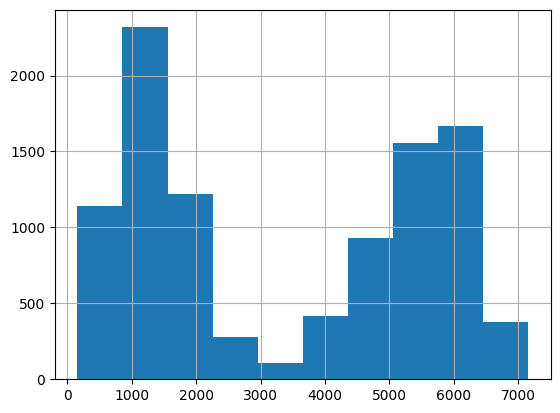

In [34]:
churndata['Bandwidth_GB_Year'].hist()

After the imputation, the graph still has a bimodal distribuation that is non-symetric, but now there is a spike at the median value.  You can also see that there are now 0 NULL values in the Tenure column.

In [35]:
churndata['Bandwidth_GB_Year'].isnull().sum()

0

## TechSupport imputation

In [36]:
print(churndata['TechSupport'].mode())

0    No
Name: TechSupport, dtype: object


In [37]:
churndata['TechSupport'] = churndata['TechSupport'].fillna(churndata['TechSupport'].mode()[0])

The TechSupport graph shows that it is a yes/no option and there are no NULL values in after the imputation. The prefered imputation method for categorical data is to use the Mode value when imputing data for the NULL values. 



<Axes: >

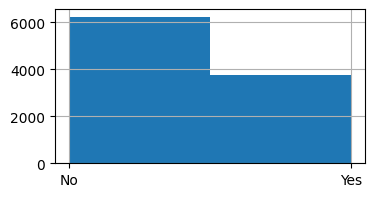

In [38]:
churndata['TechSupport'].hist(bins = 2, figsize=(4,2))

In [39]:
churndata['TechSupport'].isnull().sum()

0

### Techie imputation

The Techie graph shows that it is a yes/no option and there are NULL values in addition. The prefered imputation method for cateforical data is to use the Mode value when imputing data for the NULL values.



In [40]:
print(churndata['Techie'].mode())

0    No
Name: Techie, dtype: object


In [41]:

churndata['Techie'] = churndata['Techie'].fillna(churndata['Techie'].mode()[0])

After the imputation, the graph still has changed a bit and there are more values at the mode value of 0. You can also see that there are now 0 NULL values in the Techie column.

<Axes: >

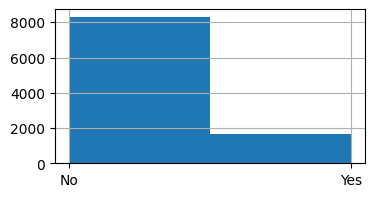

In [42]:
churndata['Techie'].hist(bins = 2, figsize=(4,2))

In [43]:
churndata['Techie'].isnull().sum()

0

### Phone imputation

The Phone graph shows that it is a yes no option and there are NULL values in addition.  The prefered imputation method for categorical data is to use the Mode value when imputing data for the NULL values.


In [44]:
print(churndata['Phone'].mode())

0    Yes
Name: Phone, dtype: object


In [45]:
churndata['Phone'] = churndata['Phone'].fillna(churndata['Phone'].mode()[0])

After the imputation, the graph still has changed a bit and there are more values at the mode value of 0. You can also see that there are now 0 NULL values in the Phone column.

<Axes: >

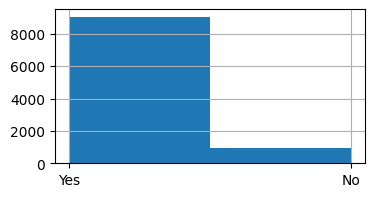

In [46]:
churndata['Phone'].hist(bins = 2, figsize=(4,2))

In [47]:
churndata['Phone'].isnull().sum()

0

### All NULL values from each column have been imputed.

In [48]:
churndata.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

### Update the CSV file with imputed data.

In [49]:
churndata.to_csv('MLR_TreatedData.csv')

# Data Wrangling

 ## Code to change the column names of items1 through items8

In [50]:
churndata.rename(columns={'item1':'TimelyResponse'}, inplace=True)

In [51]:
churndata.rename(columns={'item2':'TimelyFixes'}, inplace=True)

In [52]:
churndata.rename(columns={'item3':'TimelyReplacements'}, inplace=True)

In [53]:
churndata.rename(columns={'item4':'Reliability'}, inplace=True)

In [54]:
churndata.rename(columns={'item5':'Options'}, inplace=True)

In [55]:
churndata.rename(columns={'item6':'TimelyFixes'}, inplace=True)

In [56]:
churndata.rename(columns={'item7':'CourteousExchange'}, inplace=True)

In [57]:
churndata.rename(columns={'item8':'ActiveListening'}, inplace=True)

The column names were changed.

In [58]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

### Update the CSV file to include column name changes

In [59]:
churndata.to_csv('MLR_TreatedData.csv')

## Make Customer_id the index for the table.

In [60]:
churndata.set_index('Customer_id')

,CaseOrder,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
Customer_id,,,,,,,,,,,,,,,,,,,,,
K409198,1,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
S120509,2,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
K191035,3,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
D90850,4,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
K662701,5,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M324793,9996,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
D861732,9997,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
I243405,9998,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,...,169.974100,4159.305799,4,4,4,4,4,4,4,5


You can see that the index for the table is now Customer_id.

In [61]:
display(churndata.isnull().any())

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProt

### prints out a correlation matrix

In [62]:
display(churndata.corr())

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,1.000000,3.007020e-03,-0.014680,-0.001363,-0.007494,-0.006148,0.016038,0.000192,-0.001358,-0.011274,...,0.003677,0.825561,-0.004318,0.005959,0.003245,-5.640975e-03,0.016429,-0.007837,0.003595,-0.014840
Zip,0.003007,1.000000e+00,-0.042580,-0.901786,0.045138,-0.017205,-0.008135,0.002947,-0.011520,-0.007860,...,-0.008717,-0.002527,-0.026024,-0.003215,-0.019687,6.196497e-07,0.002923,0.007375,-0.005537,-0.002577
Lat,-0.014680,-4.257985e-02,1.000000,-0.100639,-0.220598,-0.000452,-0.002943,0.006563,0.004827,-0.030042,...,0.001406,-0.016949,0.005793,0.005380,-0.003421,1.101487e-02,-0.000464,-0.008726,0.006087,-0.019583
Lng,-0.001363,-9.017856e-01,-0.100639,1.000000,-0.048294,0.013634,0.012117,-0.002997,0.005646,0.007872,...,0.011765,0.003446,0.024389,0.003024,0.014966,-2.397805e-03,0.001366,-0.008770,0.001601,0.001912
Population,-0.007494,4.513808e-02,-0.220598,-0.048294,1.000000,-0.005877,0.010538,-0.008639,0.005483,0.017962,...,-0.004778,-0.003902,0.000618,-0.002571,0.001620,-8.272481e-03,0.006970,0.000834,-0.013062,0.008524
Children,-0.006148,-1.720505e-02,-0.000452,0.013634,-0.005877,1.000000,-0.029732,0.009942,0.001889,0.004479,...,-0.009781,0.025585,0.011470,0.013146,0.003394,-1.676831e-02,-0.000240,-0.000547,0.000687,-0.005236
Age,0.016038,-8.135285e-03,-0.002943,0.012117,0.010538,-0.029732,1.000000,-0.004091,-0.008047,0.001588,...,0.010729,-0.014724,-0.005972,0.006659,-0.003778,1.223656e-02,-0.008305,0.010635,0.005353,0.015193
Income,0.000192,2.946523e-03,0.006563,-0.002997,-0.008639,0.009942,-0.004091,1.000000,-0.010011,-0.009267,...,-0.003014,0.003674,-0.004009,0.007718,-0.002707,-2.274962e-02,0.011111,0.001768,0.016599,0.000740
Outage_sec_perweek,-0.001358,-1.152040e-02,0.004827,0.005646,0.005483,0.001889,-0.008047,-0.010011,1.000000,0.003994,...,0.020496,0.004176,-0.023338,-0.008076,-0.021366,-5.992006e-03,-0.004156,-0.014752,-0.020854,0.008126
Email,-0.011274,-7.860018e-03,-0.030042,0.007872,0.017962,0.004479,0.001588,-0.009267,0.003994,1.000000,...,0.001997,-0.014579,0.003709,0.001156,0.012928,9.150354e-04,-0.007929,0.014468,0.010010,-0.005857


In [63]:
## Correlation Matrix

<Axes: >

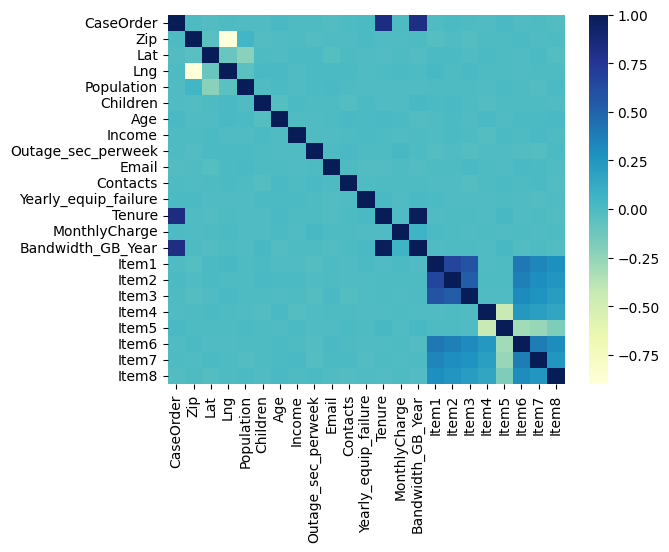

In [64]:
sns.heatmap(churndata.corr(),xticklabels =churndata.corr().columns, cmap='YlGnBu' )

# Data Wrangling

In [65]:
MLRdata = churndata[['Churn', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone'  , 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

In [66]:
MLRdata

,Churn,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,No,0,1,No,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,6.795513,172.455519,904.536110
1,Yes,0,1,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,1.156681,242.632554,800.982766
2,No,0,1,Yes,Yes,No,Yes,Yes,No,No,No,No,No,Yes,Yes,15.754144,159.947583,2054.706961
3,No,2,0,Yes,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,17.087227,119.956840,2164.579412
4,Yes,2,1,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,1.670972,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,No,2,0,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,68.197130,159.979400,6511.252601
9996,No,2,0,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,61.040370,207.481100,5695.951810
9997,No,0,0,No,No,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,47.416890,169.974100,4159.305799
9998,No,1,0,No,No,Yes,No,Yes,No,No,No,Yes,Yes,Yes,Yes,71.095600,252.624000,6468.456752


In [67]:
MLRdata.isnull().sum()

Churn                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Port_modem              0
Tablet                  0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

## Mean, median and mode for the predictor and target variable

In [68]:
MLRdata.describe()
 

,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.994200,0.398000,34.526188,172.624816,3392.341550
std,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.000000,1.000259,79.978860,155.506715
25%,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,2.000000,1.000000,61.479795,200.734725,5586.141370
max,7.000000,6.000000,71.999280,290.160419,7158.981530


# Data Wrangling

### Contacts

In [69]:
MLRdata.Contacts.unique()

array([0, 2, 3, 1, 4, 5, 6, 7], dtype=int64)

### Yearly_equip_failure    

In [70]:
MLRdata.Yearly_equip_failure.unique()

array([1, 0, 3, 2, 4, 6], dtype=int64)

## No/Yes to 0/1

In [71]:
MLRdata.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [72]:
MLRdata.Churn.replace(['No', 'Yes'], [0, 1], inplace=True)

MLRdata.Churn.unique()

array([0, 1], dtype=int64)

### Techie    

In [73]:
MLRdata.Techie.unique()

array(['No', 'Yes'], dtype=object)

In [74]:
MLRdata.Techie.replace(['No', 'Yes'], [0, 1], inplace=True)

MLRdata.Techie.unique()

array([0, 1], dtype=int64)

              
             
### Port_modem     

In [75]:
MLRdata.Port_modem 


0       Yes
1        No
2       Yes
3        No
4       Yes
       ... 
9995    Yes
9996     No
9997     No
9998     No
9999    Yes
Name: Port_modem, Length: 10000, dtype: object

In [76]:
MLRdata.Port_modem.replace(['No', 'Yes'], [0, 1], inplace=True)

MLRdata.Port_modem.unique()


array([1, 0], dtype=int64)

         
### Tablet            

In [77]:
MLRdata.Tablet.unique()

array(['Yes', 'No'], dtype=object)

In [78]:
MLRdata.Tablet.replace(['No', 'Yes'], [0, 1], inplace=True)

MLRdata.Tablet.unique()

array([1, 0], dtype=int64)

       
### Phone         

In [79]:
MLRdata.Phone.unique()

array(['Yes', 'No'], dtype=object)

In [80]:
MLRdata.Phone.replace(['No', 'Yes'], [0, 1], inplace=True)

MLRdata.Phone.unique()

array([1, 0], dtype=int64)

          
### Multiple    

In [81]:
MLRdata.Multiple.unique()

array(['No', 'Yes'], dtype=object)

In [82]:
MLRdata.Multiple.replace(['No', 'Yes'], [0, 1], inplace=True)

MLRdata.Multiple.unique()

array([0, 1], dtype=int64)

            
### OnlineSecurity    

In [83]:
MLRdata.OnlineSecurity.unique()

array(['Yes', 'No'], dtype=object)

In [84]:
MLRdata.OnlineSecurity.replace(['No', 'Yes'], [0, 1], inplace=True)

MLRdata.OnlineSecurity.unique()

array([1, 0], dtype=int64)

      
### OnlineBackup           ###  

In [85]:
MLRdata.OnlineBackup.unique()

array(['Yes', 'No'], dtype=object)

In [86]:
MLRdata.OnlineBackup.replace(['No', 'Yes'], [0, 1], inplace=True)

MLRdata.OnlineBackup.unique()

array([1, 0], dtype=int64)


### DeviceProtection       ###  

In [87]:
MLRdata.DeviceProtection.unique()

array(['No', 'Yes'], dtype=object)

In [88]:
MLRdata.DeviceProtection.replace(['No', 'Yes'], [0, 1], inplace=True)

MLRdata.DeviceProtection.unique()

array([0, 1], dtype=int64)


### TechSupport            ###  

In [89]:
MLRdata.TechSupport.unique()

array(['No', 'Yes'], dtype=object)

In [90]:
MLRdata.TechSupport.replace(['No', 'Yes'], [0, 1], inplace=True)

MLRdata.TechSupport.unique()

array([0, 1], dtype=int64)


### StreamingTV            ###  

In [91]:
MLRdata.StreamingTV.unique()

array(['No', 'Yes'], dtype=object)

In [92]:
MLRdata.StreamingTV.replace(['No', 'Yes'], [0, 1], inplace=True)

MLRdata.StreamingTV.unique()

array([0, 1], dtype=int64)


### StreamingMovies        ###  

In [93]:
MLRdata.StreamingMovies.unique()

array(['Yes', 'No'], dtype=object)

In [94]:
MLRdata.StreamingMovies.replace(['No', 'Yes'], [0, 1], inplace=True)

MLRdata.StreamingMovies.unique()

array([1, 0], dtype=int64)


### PaperlessBilling       ###  

In [95]:
MLRdata.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [96]:
MLRdata.PaperlessBilling.replace(['No', 'Yes'], [0, 1], inplace=True)

MLRdata.PaperlessBilling.unique()

array([1, 0], dtype=int64)

## Quantitative Data

### Continuous Data


### Tenure                 ###  

In [97]:
MLRdata.Tenure.unique()

array([ 6.79551295,  1.156681  , 15.75414408, ..., 47.41689   ,
       71.0956    , 63.35086   ])


### MonthlyCharge           

In [98]:
MLRdata.MonthlyCharge.unique()

array([172.455519, 242.632554, 159.947583, 119.95684 , 149.948316,
       185.007692, 200.118516, 114.950905, 117.468591, 162.482694,
       174.958118, 149.962093, 137.439154, 184.971516, 159.965581,
       177.65076 , 194.966286, 202.682861, 152.490739, 149.944668,
       184.978458, 127.495766, 124.964303, 162.511928,  92.455141,
       222.649979, 139.981577, 200.132293, 257.651257, 230.105118,
       147.489301, 267.664655, 162.483267, 229.993134, 140.00128 ,
       184.964681, 147.473844, 172.457857, 107.481989, 255.141716,
       192.456745, 245.174977, 195.006206, 104.962874,  92.488023,
       184.979684, 187.656013, 169.944668, 160.00128 , 129.962093,
       142.515576, 220.14775 , 124.97808 , 164.964681, 194.976769,
       152.455519,  92.5018  , 127.488728, 184.963371, 265.146969,
       207.609354, 152.462354, 212.655686, 255.119794, 134.950905,
       255.137219, 214.966286, 270.160419, 200.165175, 149.937833,
       240.114868, 187.609354, 169.992756, 120.004928, 139.956


### Bandwidth_GB_Year   

In [99]:
MLRdata.Bandwidth_GB_Year.unique()

array([ 904.5361102,  800.9827661, 2054.706961 , ..., 4159.305799 ,
       6468.456752 , 5857.586167 ])

# Write wrangled data

In [100]:
MLRdata.to_csv('MLR_TreatedData.csv')

 ## Univariate graphing of data

array([[<Axes: title={'center': 'Churn'}>,
        <Axes: title={'center': 'Contacts'}>,
        <Axes: title={'center': 'Yearly_equip_failure'}>,
        <Axes: title={'center': 'Techie'}>],
       [<Axes: title={'center': 'Port_modem'}>,
        <Axes: title={'center': 'Tablet'}>,
        <Axes: title={'center': 'Phone'}>,
        <Axes: title={'center': 'Multiple'}>],
       [<Axes: title={'center': 'OnlineSecurity'}>,
        <Axes: title={'center': 'OnlineBackup'}>,
        <Axes: title={'center': 'DeviceProtection'}>,
        <Axes: title={'center': 'TechSupport'}>],
       [<Axes: title={'center': 'StreamingTV'}>,
        <Axes: title={'center': 'StreamingMovies'}>,
        <Axes: title={'center': 'PaperlessBilling'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'MonthlyCharge'}>,
        <Axes: title={'center': 'Bandwidth_GB_Year'}>, <Axes: >,
        <Axes: >]], dtype=object)

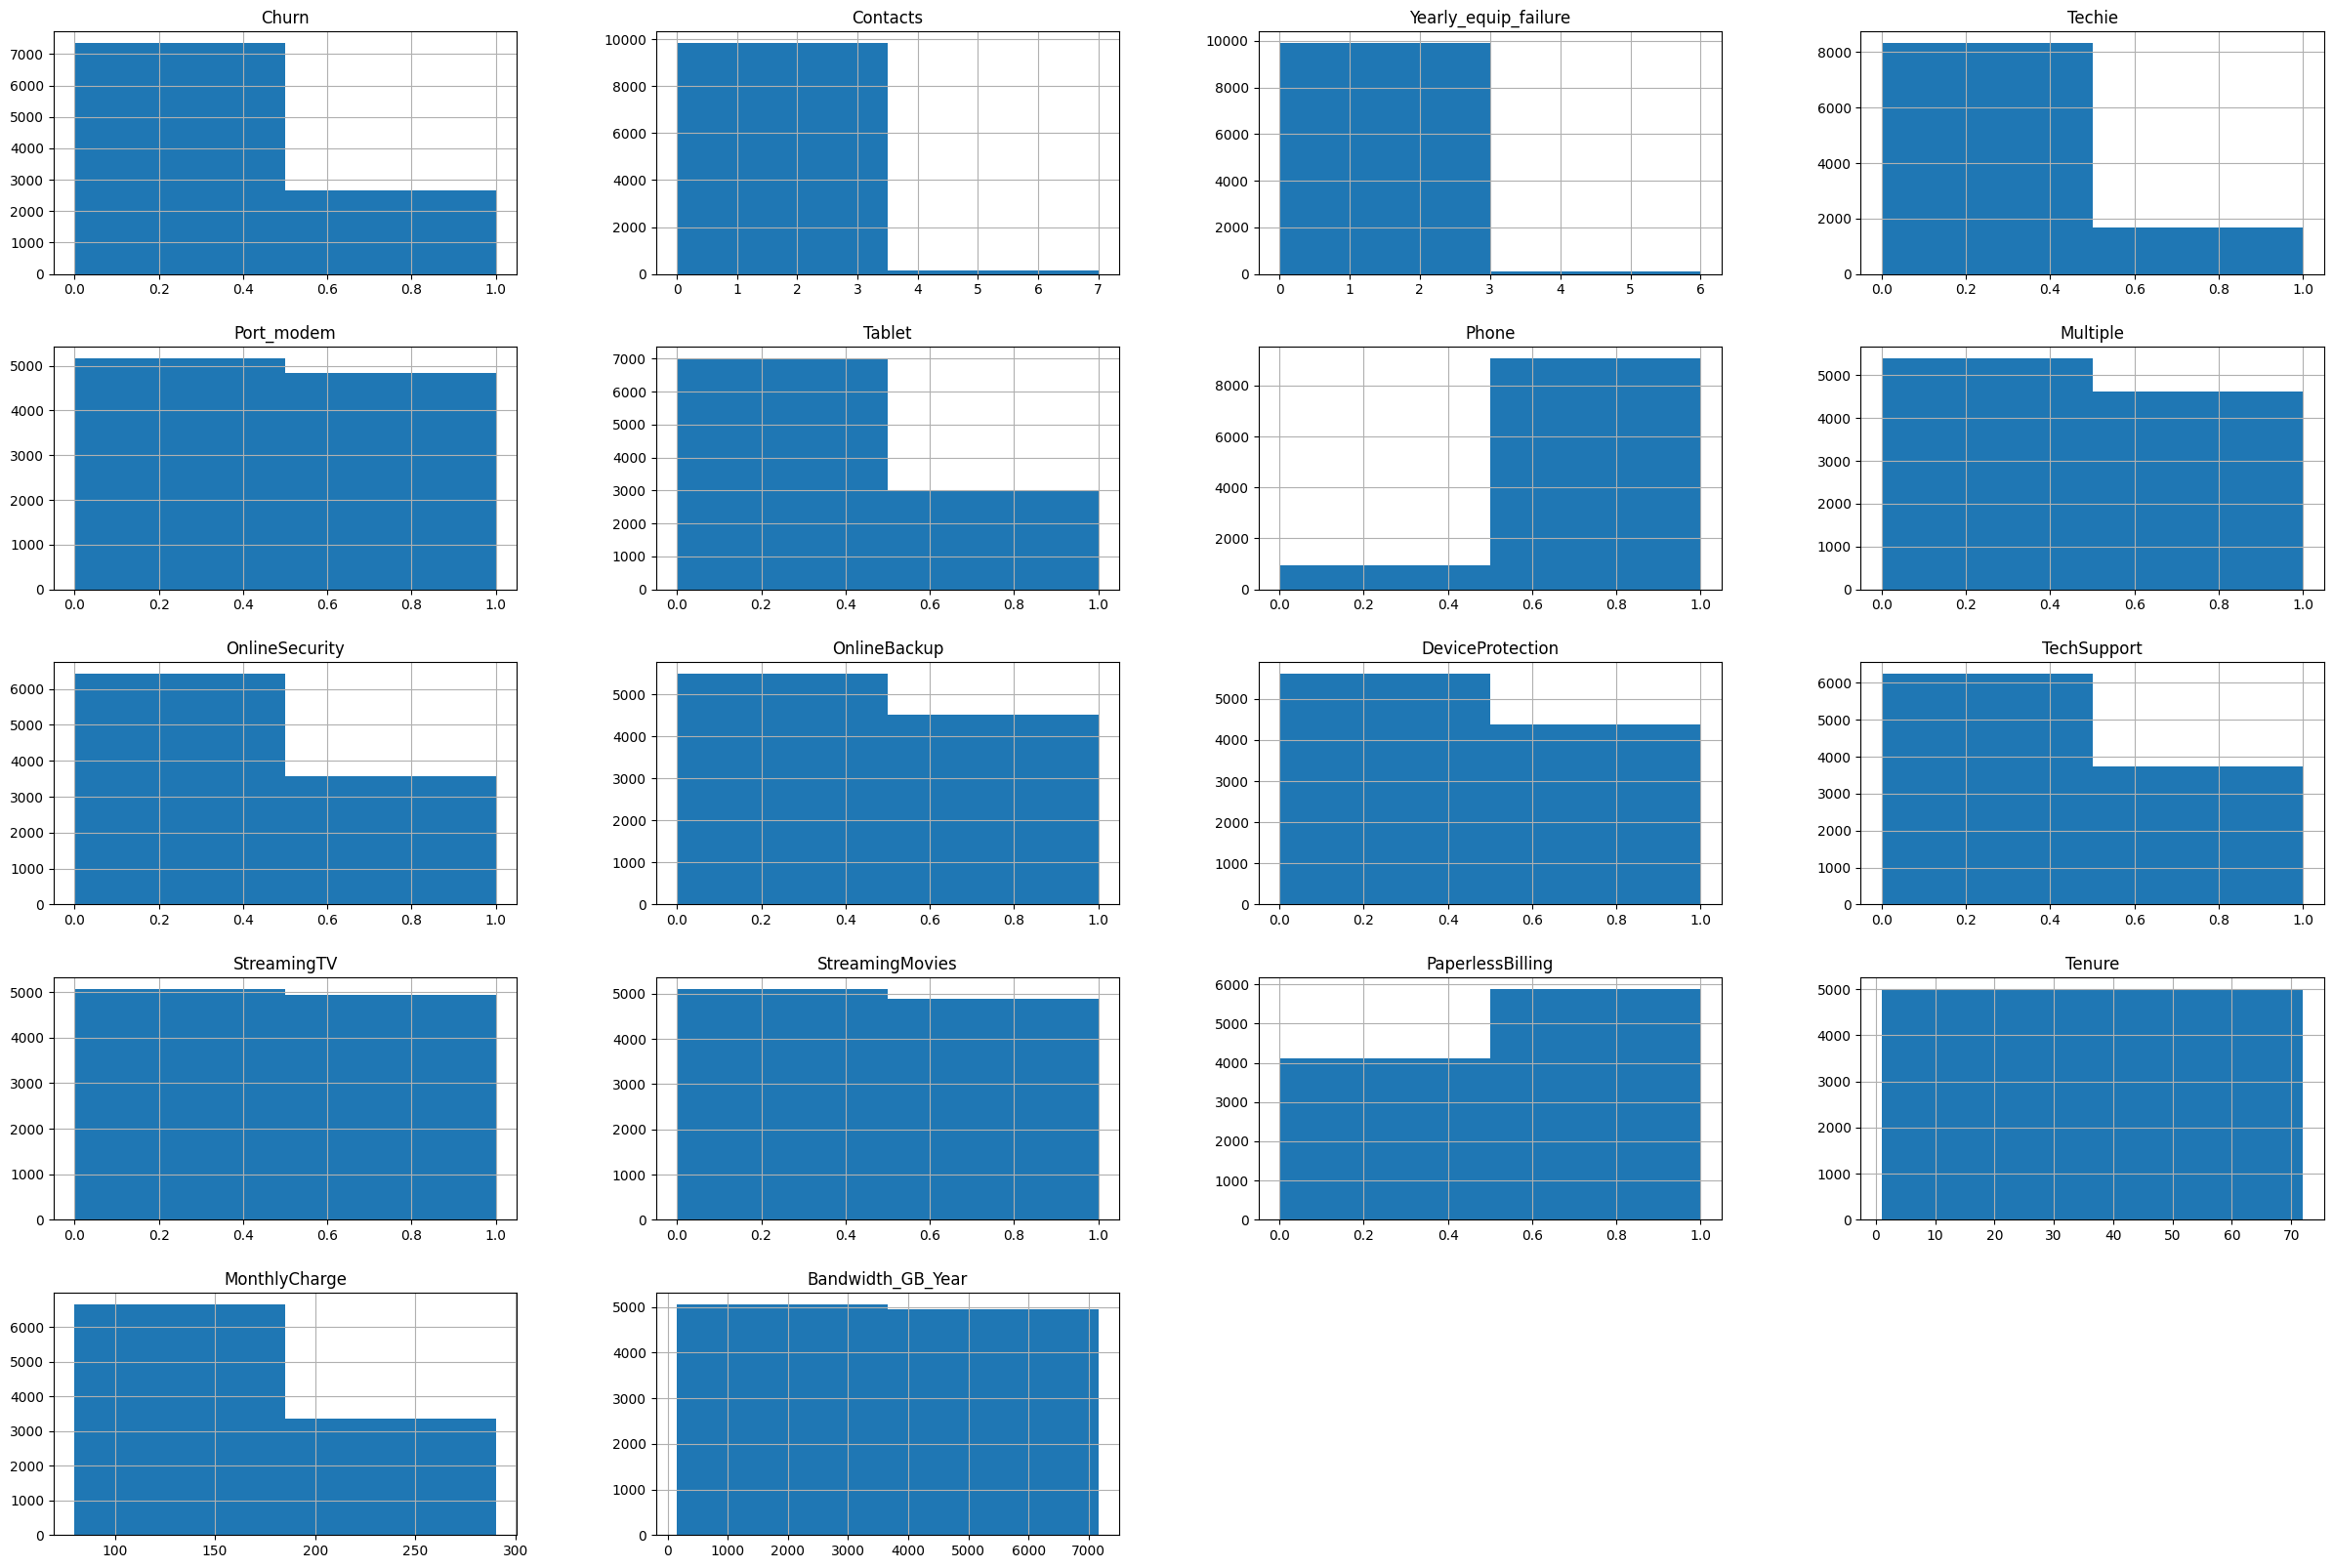

In [101]:

MLRdata.hist(bins = 2, figsize=(30,20))
  

In [102]:
 ## Histograms for all of the 

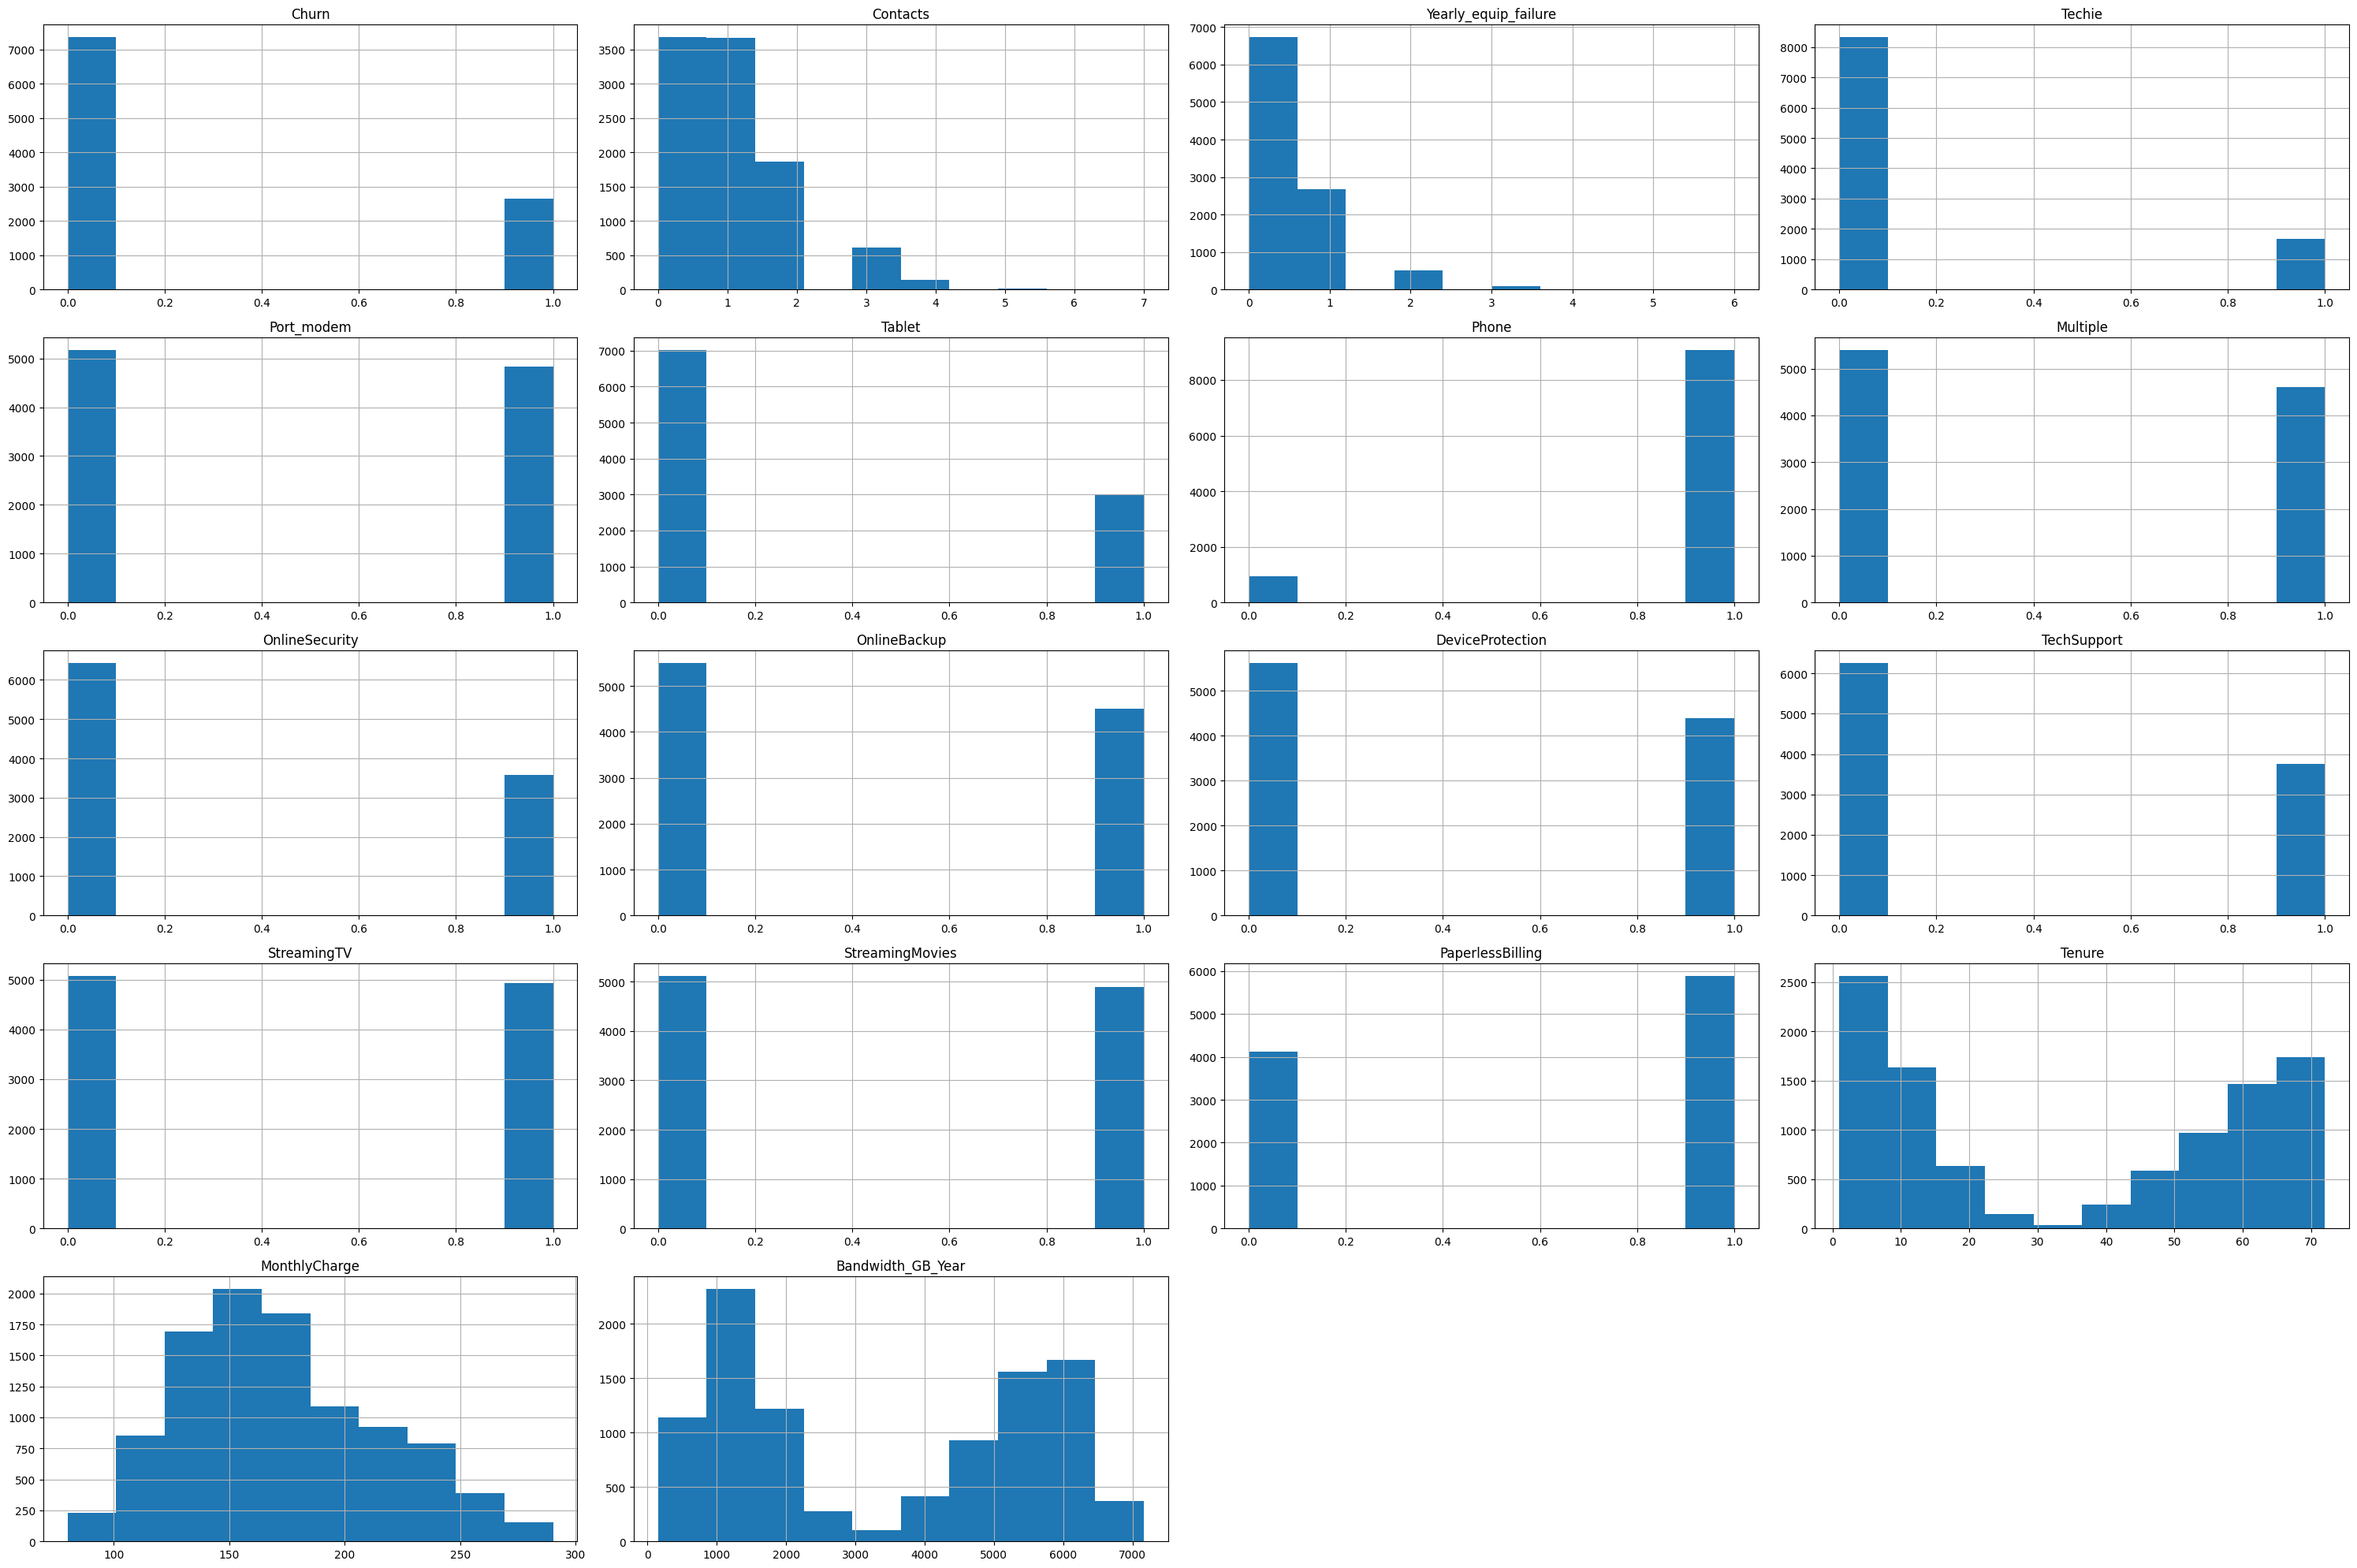

In [103]:
MLRdata.hist(bins = 10, figsize=(30,20))
plt.tight_layout()

Text(0.5, 1.0, 'Port Modem')

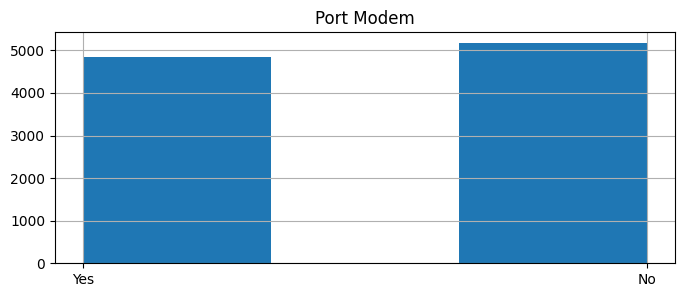

In [104]:
churndata.Port_modem.hist(bins = 3, figsize=(8,3))
plt.title('Port Modem')

Text(0.5, 1.0, 'Tablet')

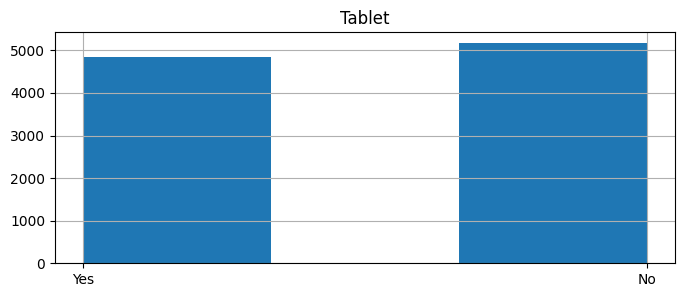

In [105]:
churndata.Port_modem.hist(bins = 3, figsize=(8,3))
plt.title('Tablet')

Text(0.5, 1.0, 'Phone')

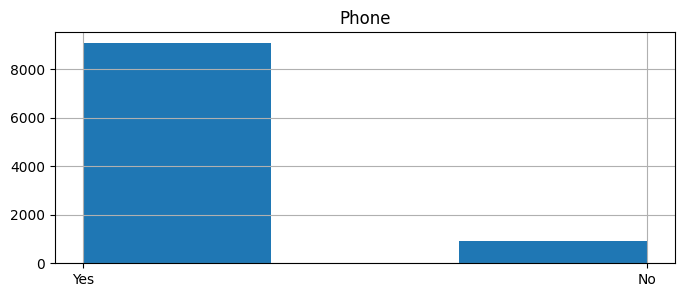

In [106]:
churndata.Phone.hist(bins = 3, figsize=(8,3))
plt.title('Phone')

Text(0.5, 1.0, 'StreamingTV')

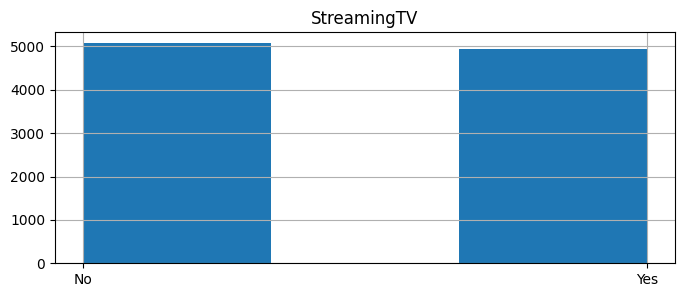

In [107]:
churndata.StreamingTV.hist(bins = 3, figsize=(8,3))
plt.title('StreamingTV')

## Boxplots for all of the items

Text(0.5, 1.0, 'Contacts')

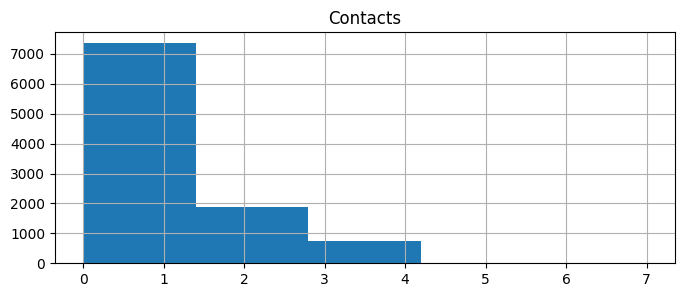

In [108]:
churndata.Contacts.hist(bins = 5, figsize=(8,3))
plt.title('Contacts')

<Axes: xlabel='Contacts'>

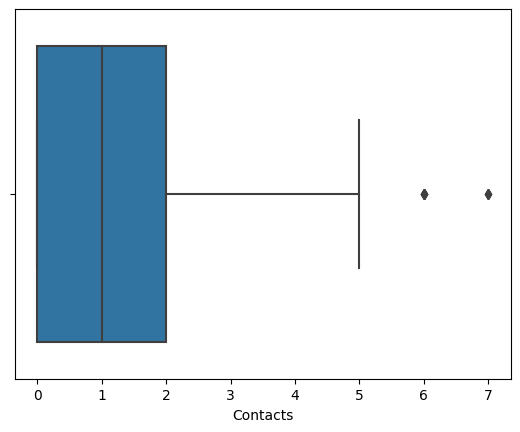

In [109]:
 sns.boxplot(x='Contacts',data=MLRdata)

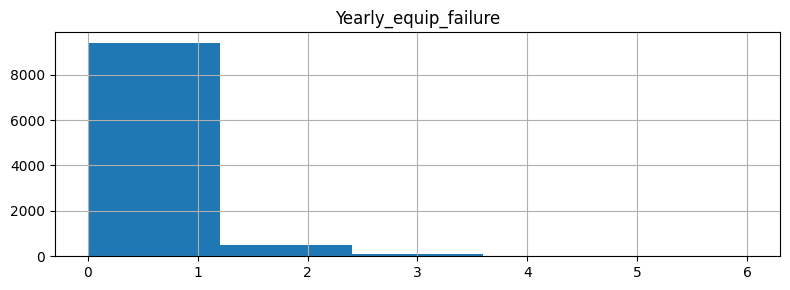

In [110]:
churndata.Yearly_equip_failure.hist(bins = 5, figsize=(8,3))
plt.title('Yearly_equip_failure')
plt.tight_layout()

<Axes: xlabel='Yearly_equip_failure'>

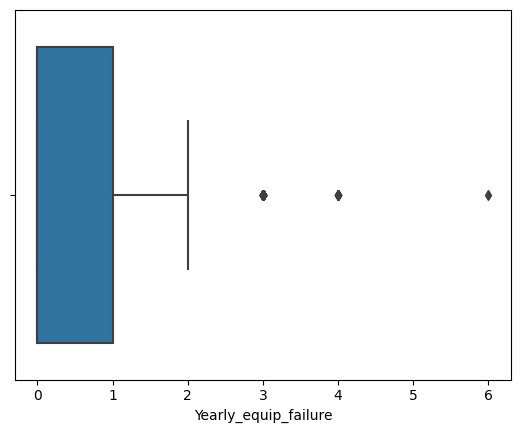

In [111]:
 sns.boxplot(x='Yearly_equip_failure',data=MLRdata)

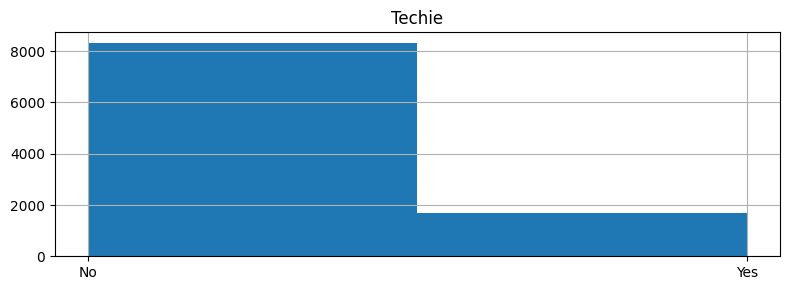

In [112]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')
plt.tight_layout()

<Axes: xlabel='Techie'>

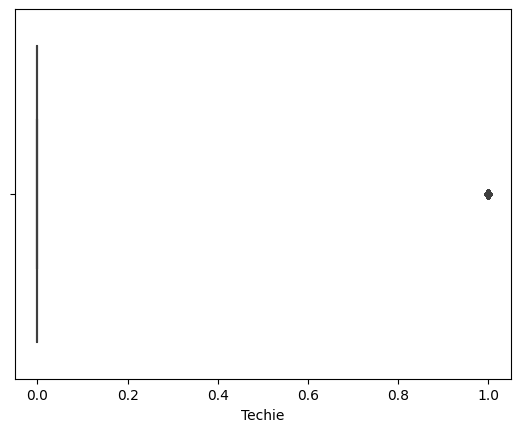

In [113]:
 sns.boxplot(x='Techie',data=MLRdata)

Text(0.5, 1.0, 'Techie')

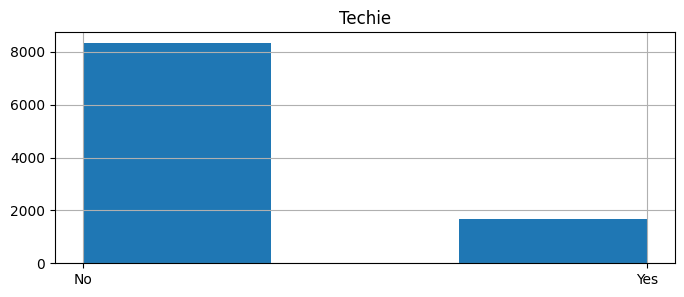

In [114]:
churndata.Techie.hist(bins = 3, figsize=(8,3))
plt.title('Techie')

Text(0.5, 1.0, 'Techie')

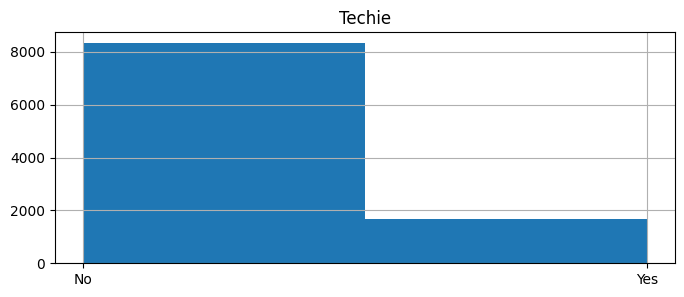

In [115]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')

<Axes: xlabel='Port_modem'>

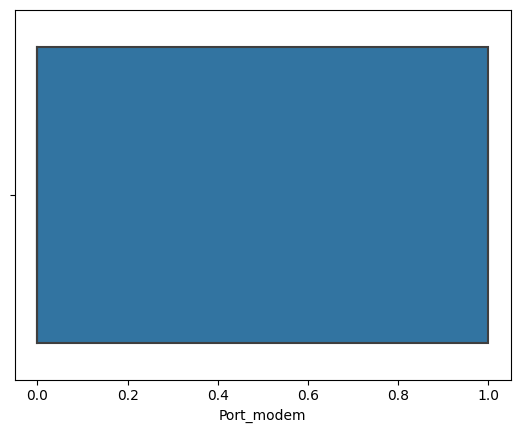

In [116]:
 sns.boxplot(x='Port_modem',data=MLRdata)


Text(0.5, 1.0, 'Techie')

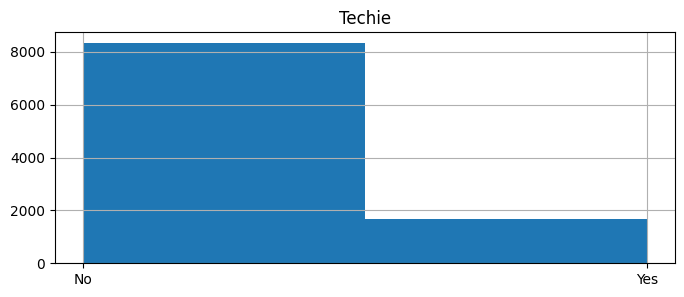

In [117]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')
 

<Axes: xlabel='Bandwidth_GB_Year'>

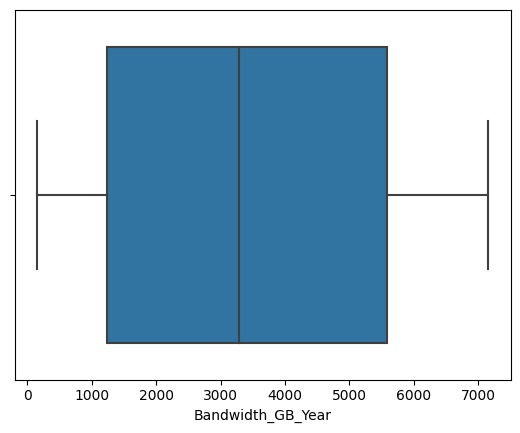

In [118]:
 sns.boxplot(x='Bandwidth_GB_Year',data=MLRdata)


Text(0.5, 1.0, 'Techie')

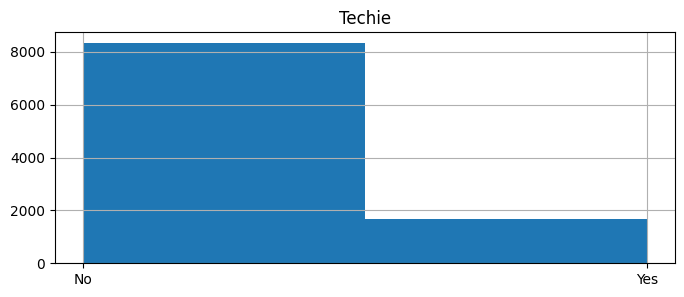

In [119]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')

<Axes: xlabel='Bandwidth_GB_Year'>

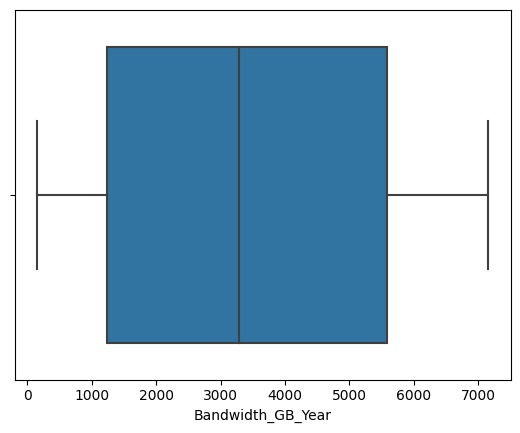

In [120]:
 sns.boxplot(x='Bandwidth_GB_Year',data=MLRdata)


Text(0.5, 1.0, 'Techie')

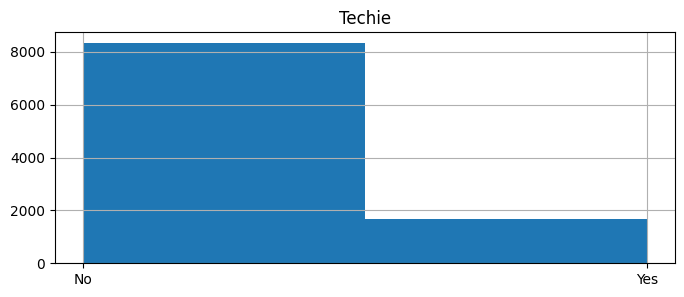

In [121]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')

<Axes: xlabel='Bandwidth_GB_Year'>

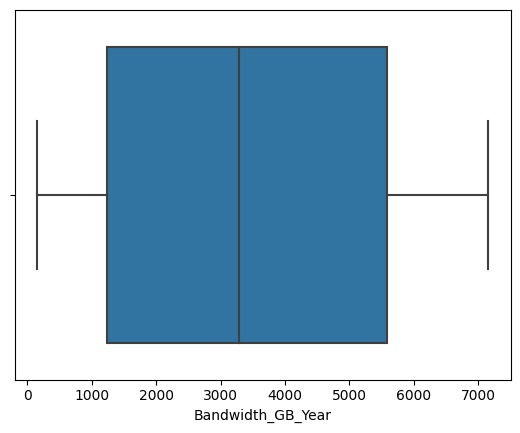

In [122]:
 sns.boxplot(x='Bandwidth_GB_Year',data=MLRdata)


Text(0.5, 1.0, 'Techie')

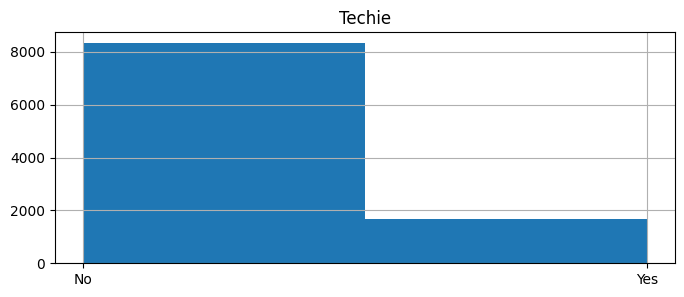

In [123]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')

<Axes: xlabel='Bandwidth_GB_Year'>

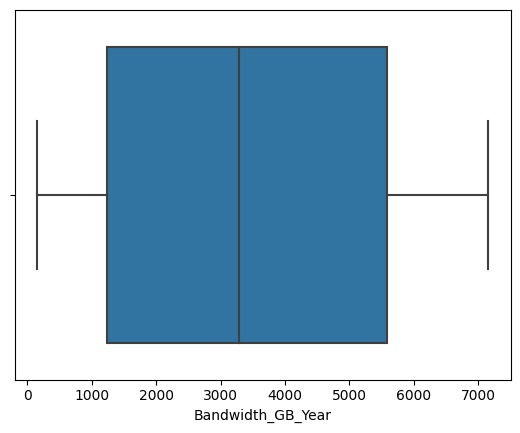

In [124]:
 sns.boxplot(x='Bandwidth_GB_Year',data=MLRdata)


Text(0.5, 1.0, 'Techie')

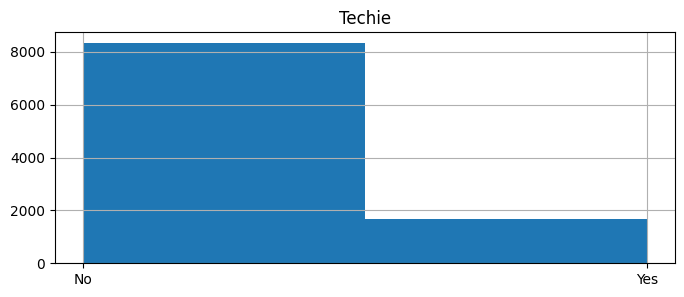

In [125]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')

<Axes: xlabel='Bandwidth_GB_Year'>

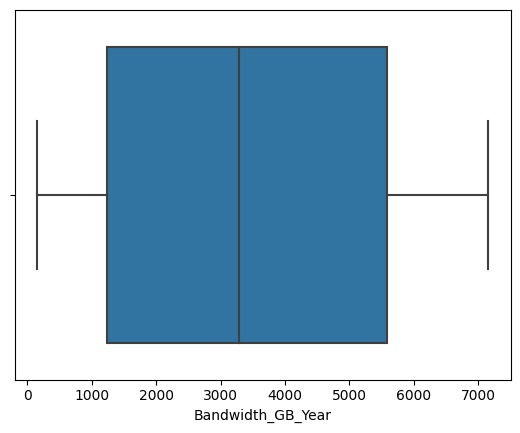

In [126]:
 sns.boxplot(x='Bandwidth_GB_Year',data=MLRdata)


Text(0.5, 1.0, 'Techie')

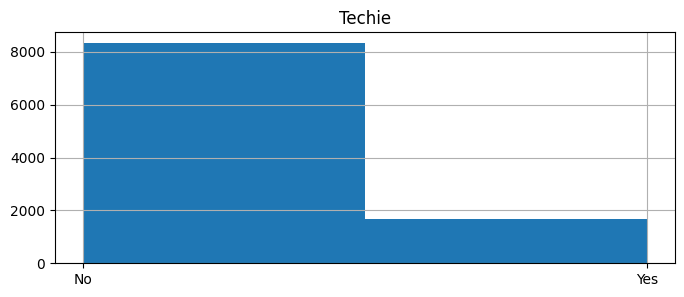

In [127]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')

<Axes: xlabel='Bandwidth_GB_Year'>

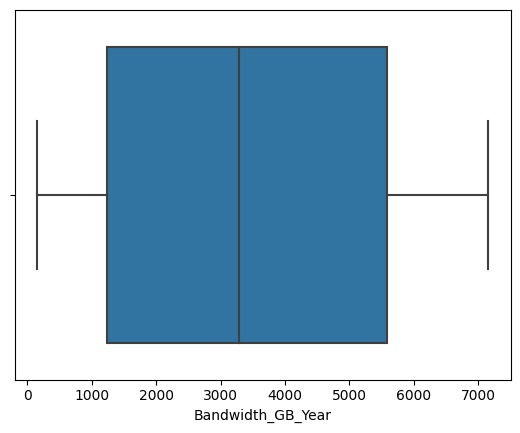

In [128]:
 sns.boxplot(x='Bandwidth_GB_Year',data=MLRdata)


Text(0.5, 1.0, 'Techie')

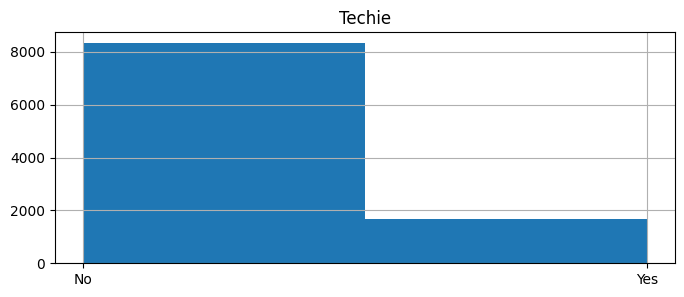

In [129]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')

<Axes: xlabel='Bandwidth_GB_Year'>

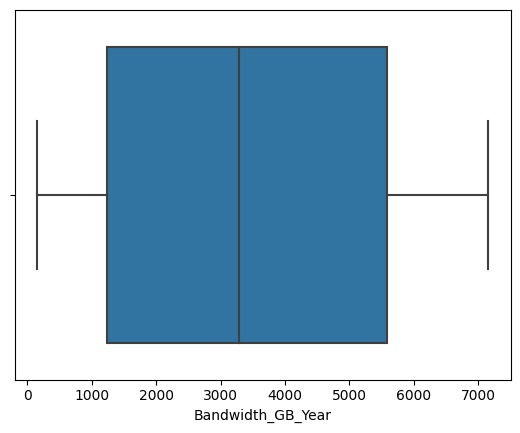

In [130]:
 sns.boxplot(x='Bandwidth_GB_Year',data=MLRdata)


Text(0.5, 1.0, 'Techie')

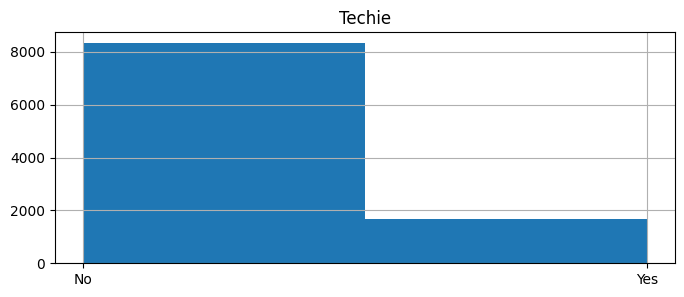

In [131]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')

<Axes: xlabel='Bandwidth_GB_Year'>

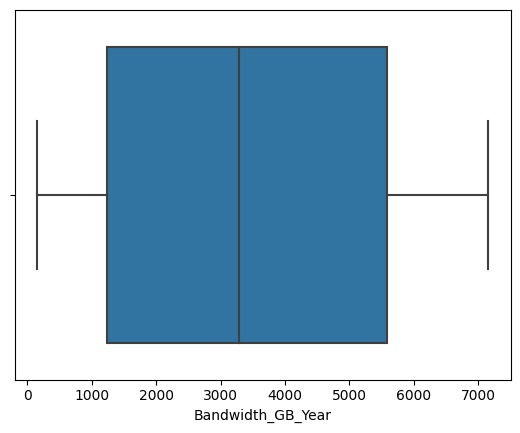

In [132]:
 sns.boxplot(x='Bandwidth_GB_Year',data=MLRdata)


Text(0.5, 1.0, 'Techie')

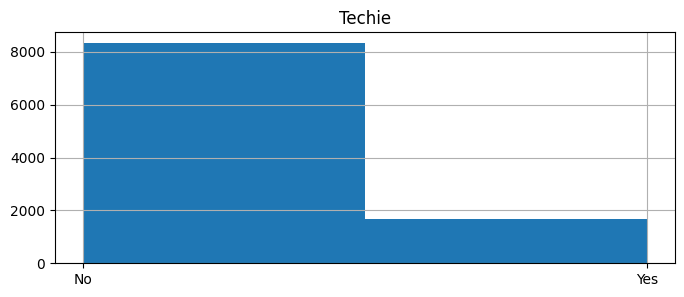

In [133]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')

<Axes: xlabel='Bandwidth_GB_Year'>

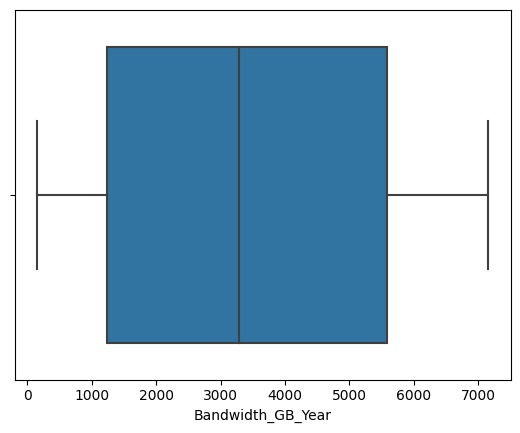

In [134]:
 sns.boxplot(x='Bandwidth_GB_Year',data=MLRdata)


Text(0.5, 1.0, 'Techie')

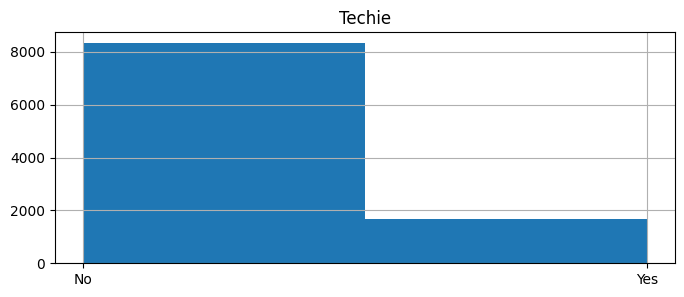

In [135]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')

<Axes: xlabel='Bandwidth_GB_Year'>

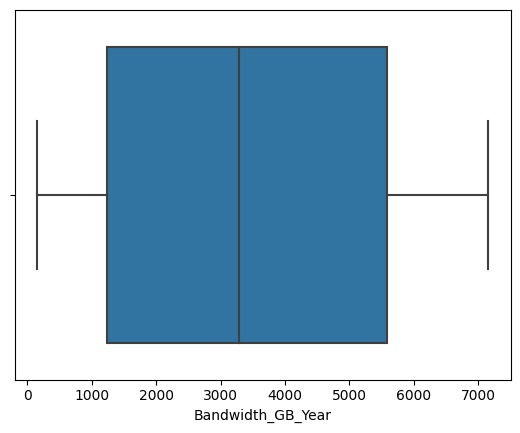

In [136]:
 sns.boxplot(x='Bandwidth_GB_Year',data=MLRdata)


Text(0.5, 1.0, 'Techie')

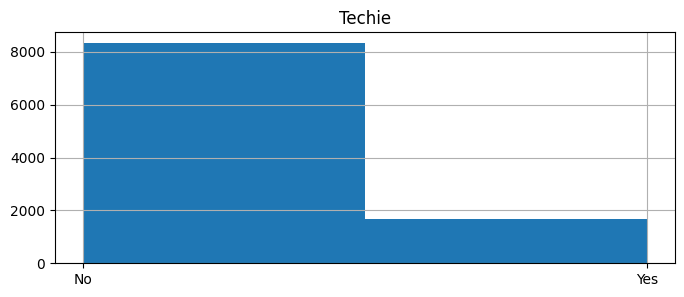

In [137]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')

Text(0.5, 1.0, 'Techie')

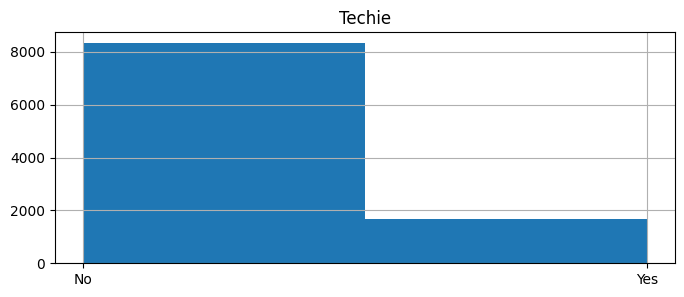

In [138]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')

Text(0.5, 1.0, 'Techie')

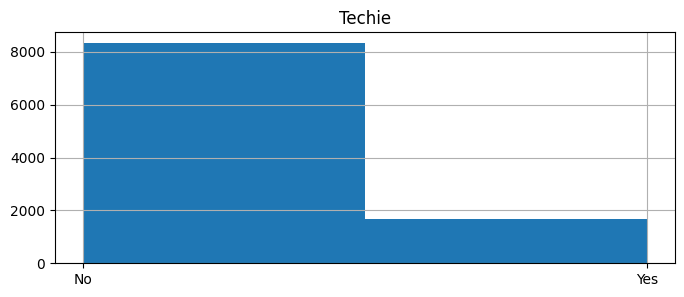

In [139]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')

<Axes: xlabel='Tenure'>

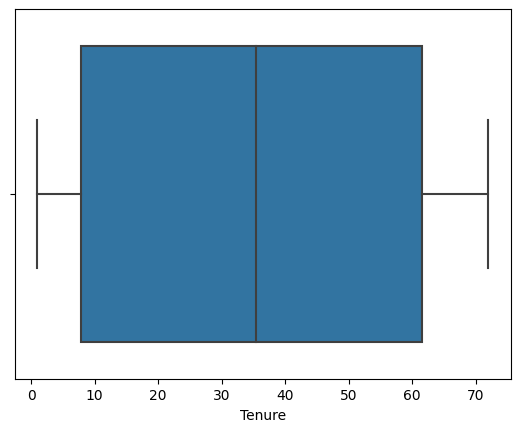

In [140]:
 sns.boxplot(x='Tenure',data=MLRdata)


Text(0.5, 1.0, 'Techie')

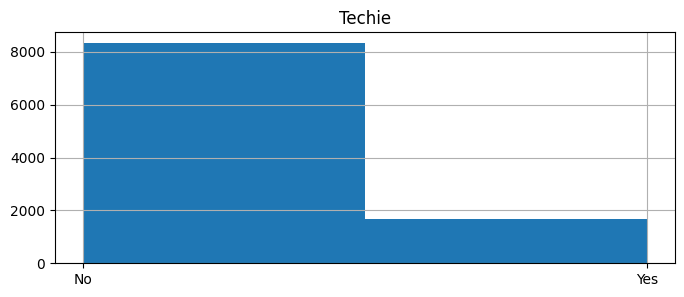

In [141]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')

<Axes: xlabel='MonthlyCharge'>

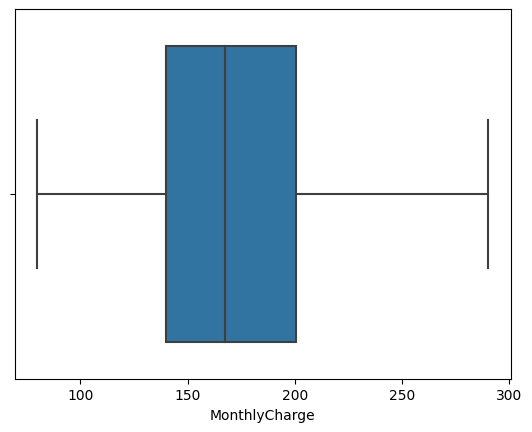

In [142]:
 sns.boxplot(x='MonthlyCharge',data=MLRdata)


Text(0.5, 1.0, 'Techie')

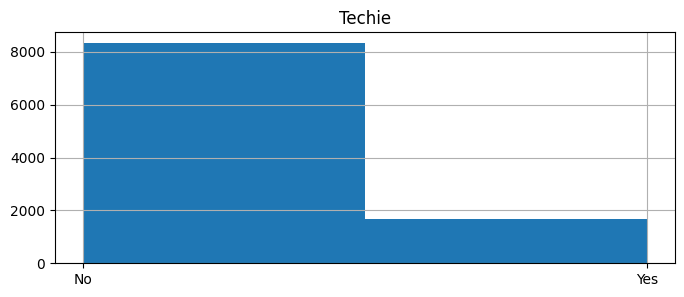

In [143]:
churndata.Techie.hist(bins = 2, figsize=(8,3))
plt.title('Techie')

In [144]:
#sns data options
#sns.boxplot(x='Bandwidth_GB_Year', y=None, hue=tab10, data=MLRdata, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None)

# bivariate graphs

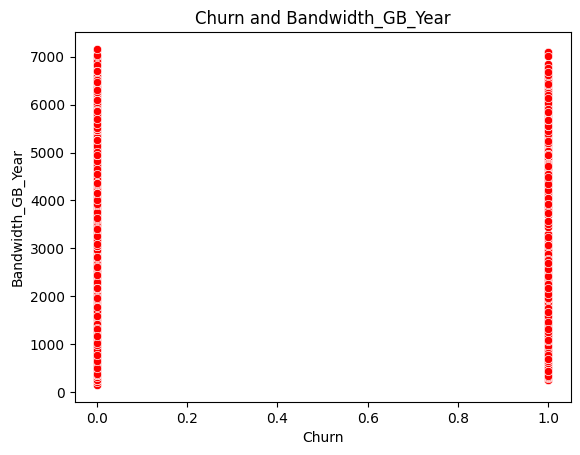

In [145]:
plt.title('Churn and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['Churn'], y=MLRdata['Bandwidth_GB_Year'],color='red')
plt.show(); 

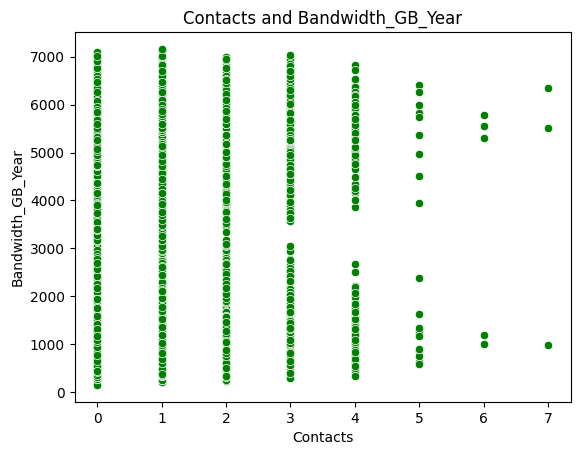

In [146]:
plt.title('Contacts and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['Contacts'], y=MLRdata['Bandwidth_GB_Year'],color='green')
plt.show(); 

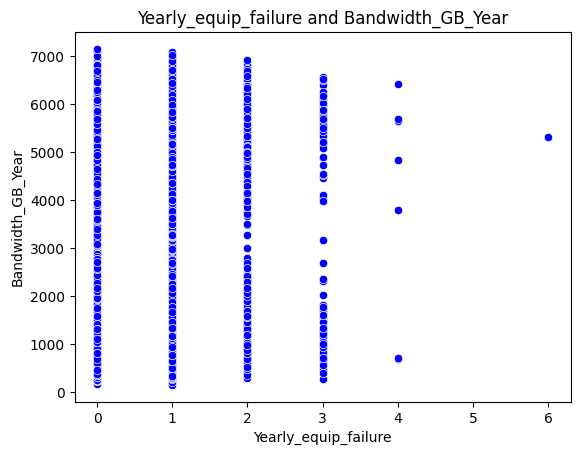

In [147]:
plt.title('Yearly_equip_failure and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['Yearly_equip_failure'], y=MLRdata['Bandwidth_GB_Year'],color='blue')
plt.show(); 

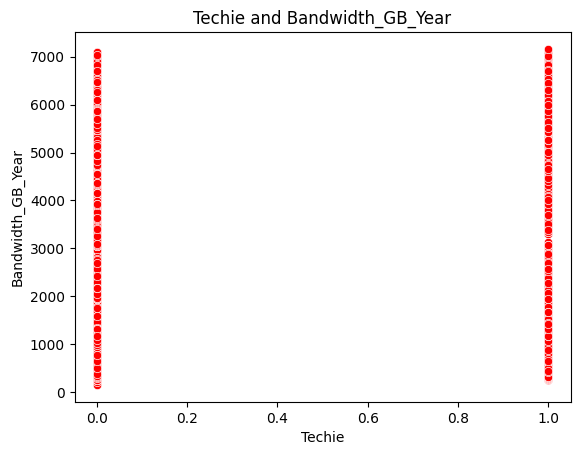

In [148]:
plt.title('Techie and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['Techie'], y=MLRdata['Bandwidth_GB_Year'],color='red')
plt.show(); 

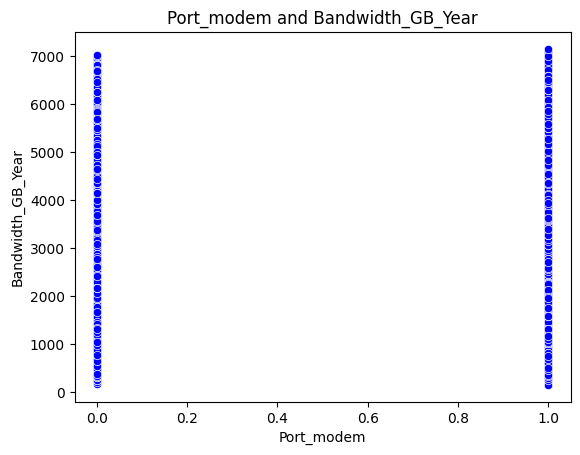

In [149]:
plt.title('Port_modem and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['Port_modem'], y=MLRdata['Bandwidth_GB_Year'],color='blue')
plt.show(); 

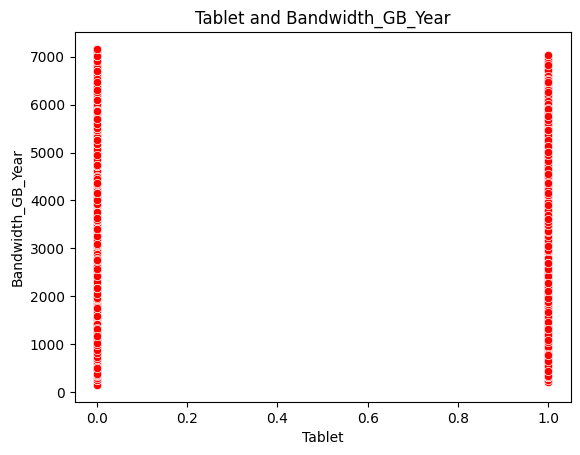

In [150]:
plt.title('Tablet and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['Tablet'], y=MLRdata['Bandwidth_GB_Year'],color='red')
plt.show(); 

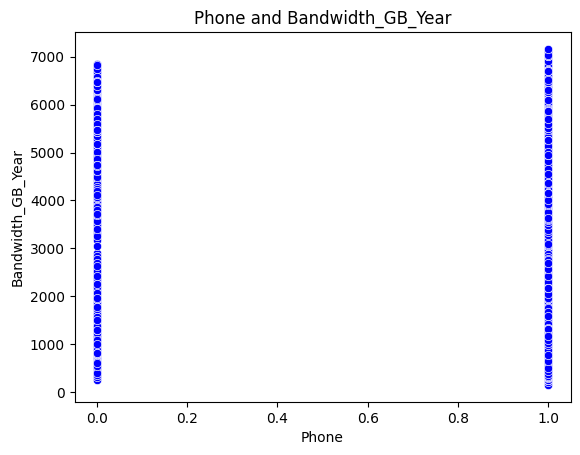

In [151]:
plt.title('Phone and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['Phone'], y=MLRdata['Bandwidth_GB_Year'],color='blue')
plt.show(); 

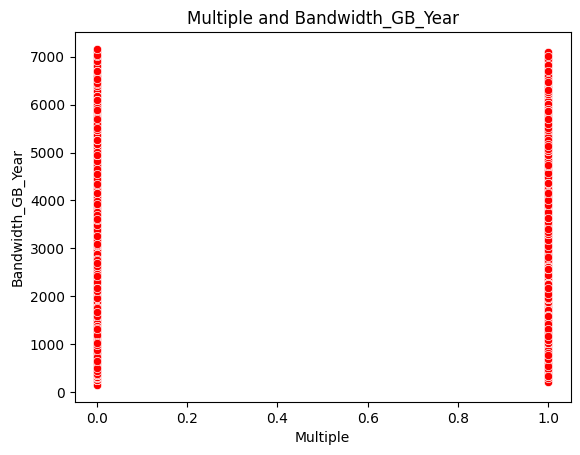

In [152]:
plt.title('Multiple and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['Multiple'], y=MLRdata['Bandwidth_GB_Year'],color='red')
plt.show(); 

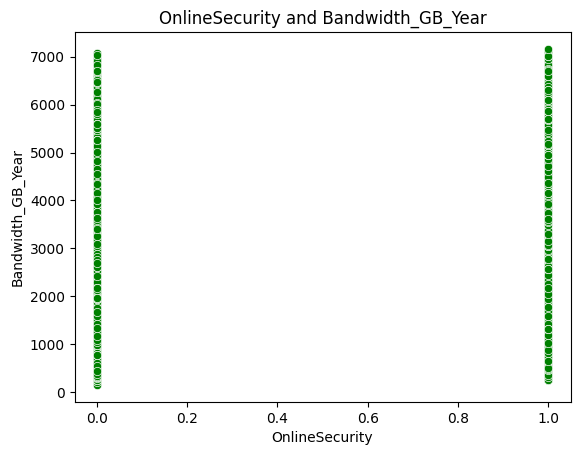

In [153]:
plt.title('OnlineSecurity and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['OnlineSecurity'], y=MLRdata['Bandwidth_GB_Year'],color='green')
plt.show(); 

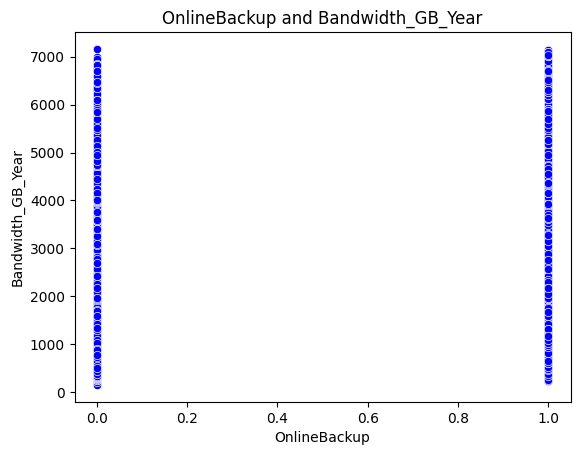

In [154]:
plt.title('OnlineBackup and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['OnlineBackup'], y=MLRdata['Bandwidth_GB_Year'],color='blue')
plt.show(); 

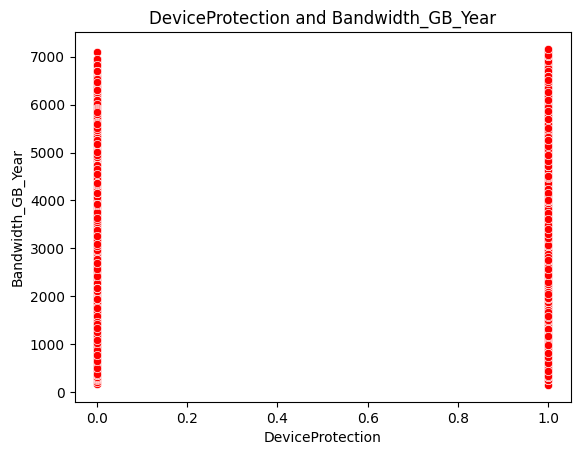

In [155]:
plt.title('DeviceProtection and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['DeviceProtection'], y=MLRdata['Bandwidth_GB_Year'],color='red')
plt.show(); 

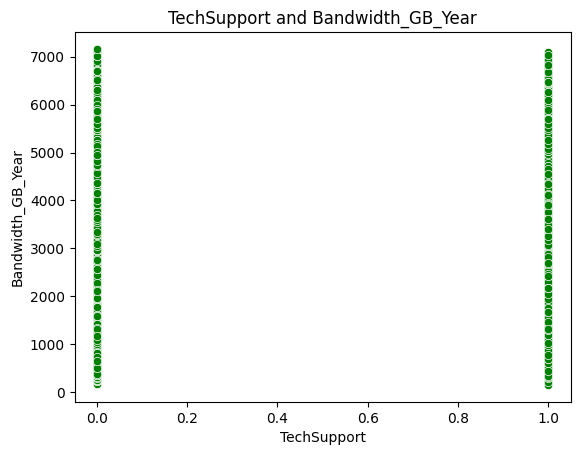

In [156]:
plt.title('TechSupport and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['TechSupport'], y=MLRdata['Bandwidth_GB_Year'],color='green')
plt.show(); 

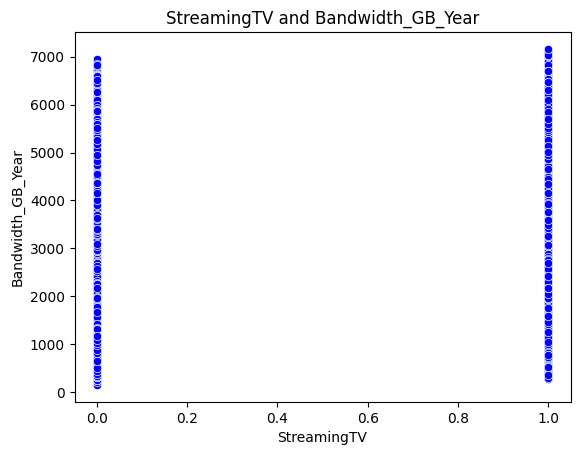

In [157]:
plt.title('StreamingTV and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['StreamingTV'], y=MLRdata['Bandwidth_GB_Year'],color='blue')
plt.show(); 

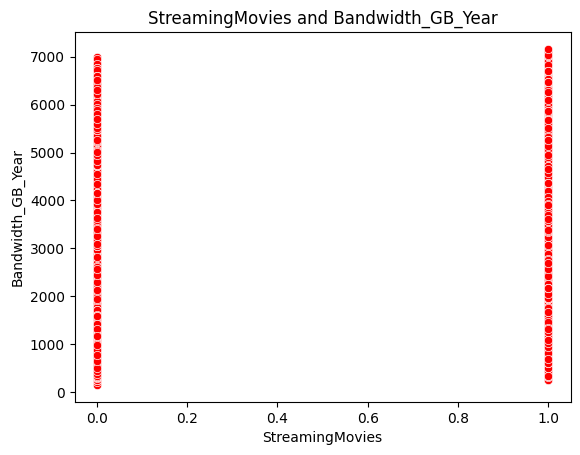

In [168]:
plt.title('StreamingMovies and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['StreamingMovies'], y=MLRdata['Bandwidth_GB_Year'],color='red')
plt.show(); 

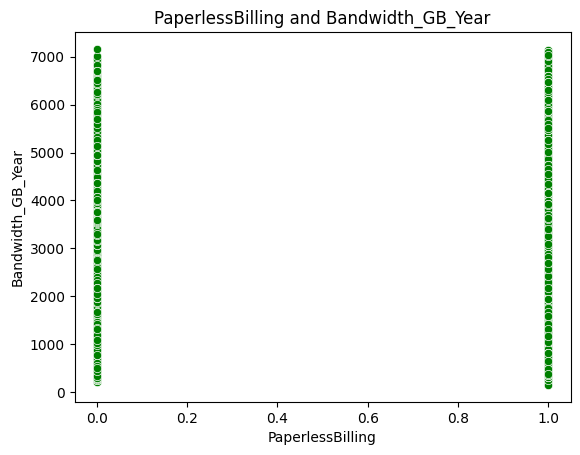

In [169]:
plt.title('PaperlessBilling and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['PaperlessBilling'], y=MLRdata['Bandwidth_GB_Year'],color='green')
plt.show(); 

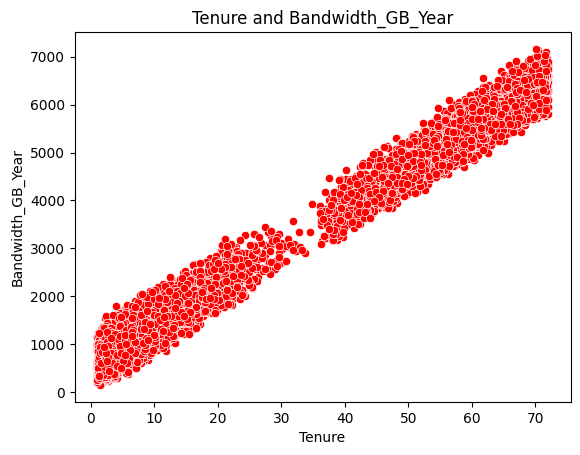

In [170]:
plt.title('Tenure and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['Tenure'], y=MLRdata['Bandwidth_GB_Year'],color='red')
plt.show(); 

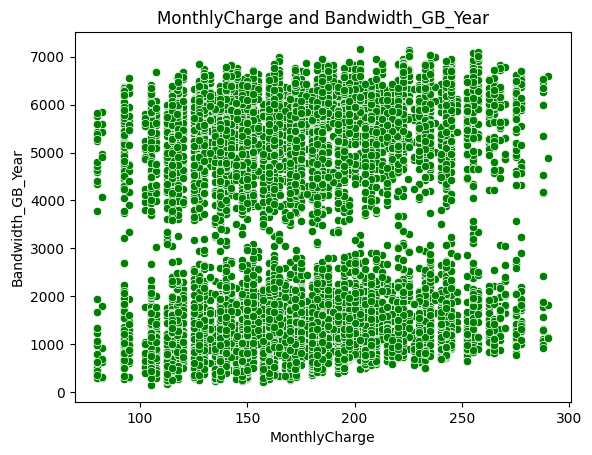

In [171]:
plt.title('MonthlyCharge and Bandwidth_GB_Year')
sns.scatterplot(x=MLRdata['MonthlyCharge'], y=MLRdata['Bandwidth_GB_Year'],color='green')
plt.show(); 

# Regression plot with line

I did the regression plots with the line in another color because it was easier to see.

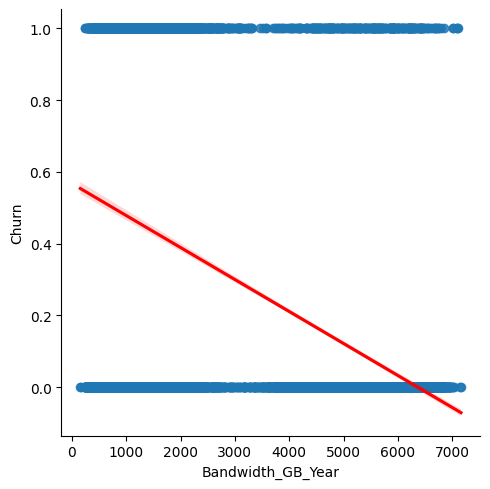

In [172]:
sns.lmplot(x="Bandwidth_GB_Year", y="Churn", data=MLRdata, line_kws={'color': 'red'})

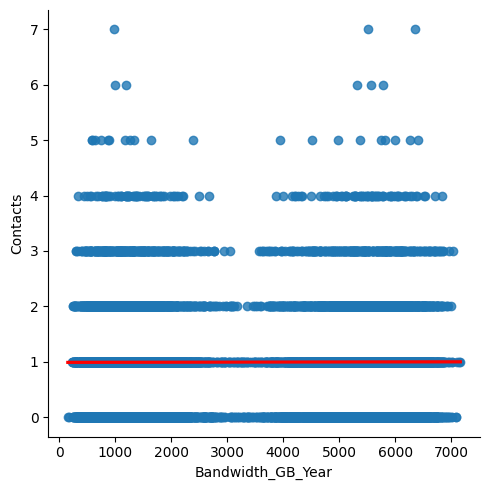

In [173]:
sns.lmplot(x="Bandwidth_GB_Year", y="Contacts", data=MLRdata, line_kws={'color': 'red'})

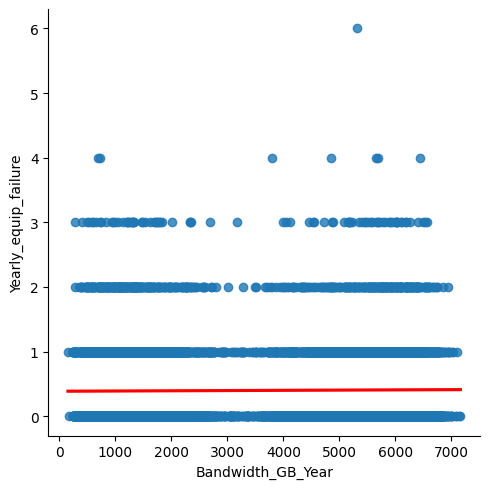

In [182]:
sns.lmplot( x="Bandwidth_GB_Year", y="Yearly_equip_failure", data=MLRdata, line_kws={'color': 'red'}) 

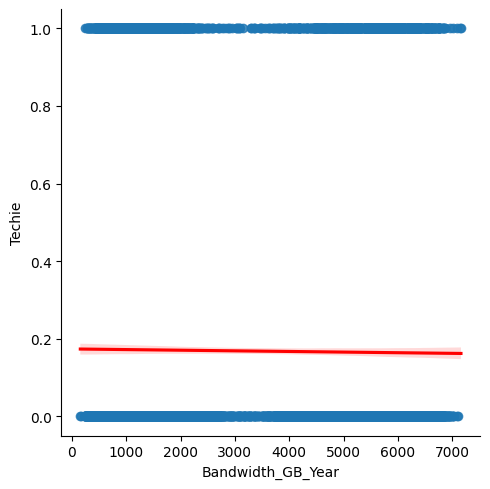

In [181]:
sns.lmplot(  x="Bandwidth_GB_Year", y="Techie", data=MLRdata, line_kws={'color': 'red'}) 

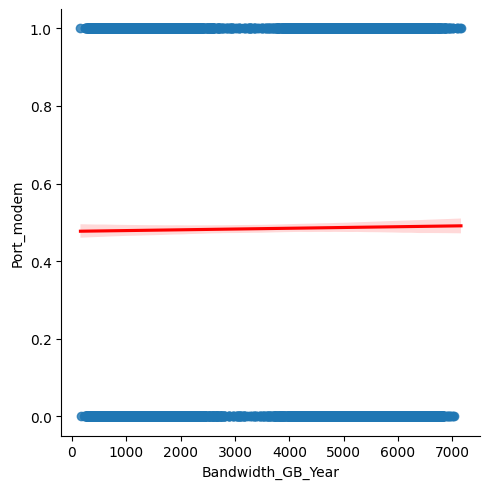

In [183]:
sns.lmplot(  x="Bandwidth_GB_Year", y="Port_modem", data=MLRdata, line_kws={'color': 'red'}) 

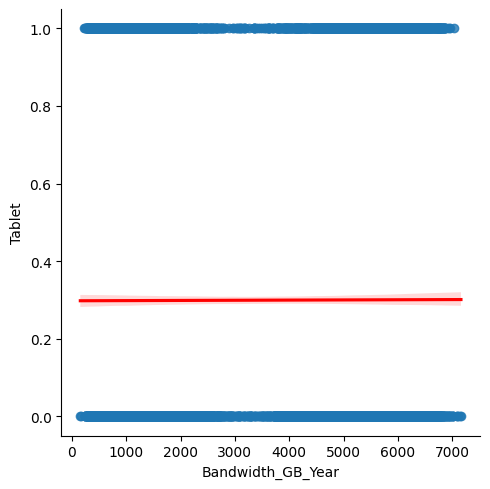

In [184]:
sns.lmplot( x="Bandwidth_GB_Year", y="Tablet", data=MLRdata, line_kws={'color': 'red'}) 

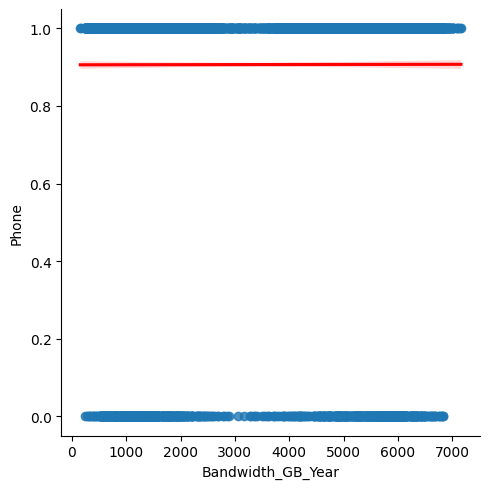

In [185]:
sns.lmplot( x="Bandwidth_GB_Year", y="Phone", data=MLRdata, line_kws={'color': 'red'})

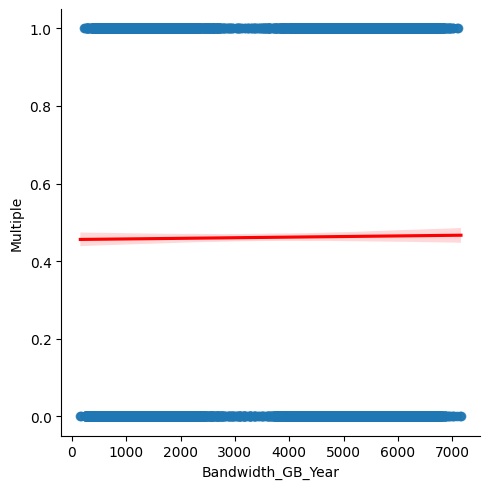

In [186]:
sns.lmplot(  x="Bandwidth_GB_Year", y="Multiple", data=MLRdata, line_kws={'color': 'red'}) 

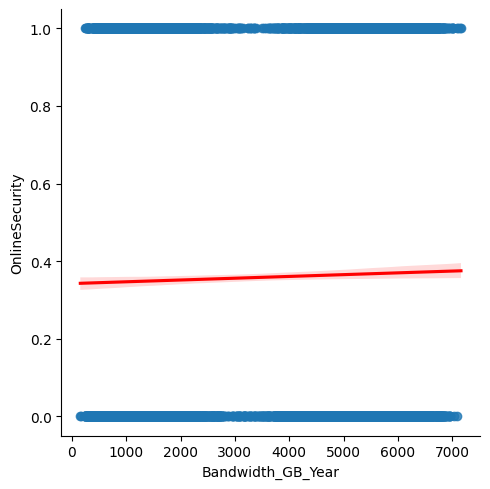

In [187]:
sns.lmplot(  x="Bandwidth_GB_Year", y="OnlineSecurity", data=MLRdata, line_kws={'color': 'red'}) 

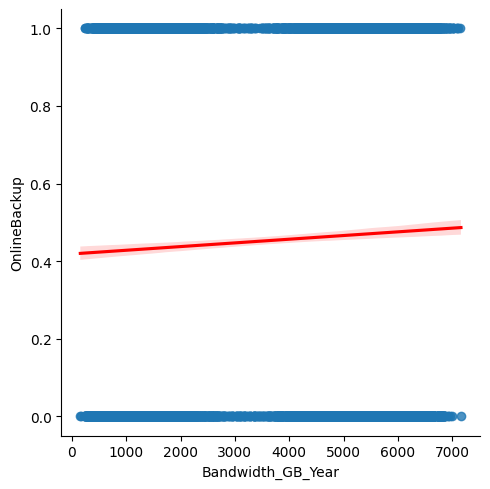

In [188]:

sns.lmplot(  x="Bandwidth_GB_Year", y="OnlineBackup", data=MLRdata, line_kws={'color': 'red'}) 

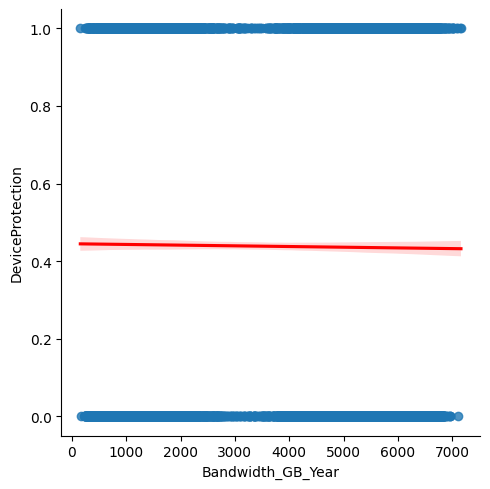

In [190]:
sns.lmplot( x="Bandwidth_GB_Year", y="DeviceProtection", data=MLRdata, line_kws={'color': 'red'}) 

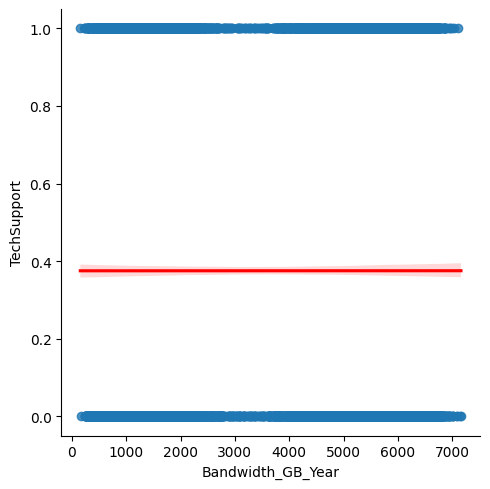

In [191]:
sns.lmplot(  x="Bandwidth_GB_Year", y="TechSupport", data=MLRdata, line_kws={'color': 'red'}) 


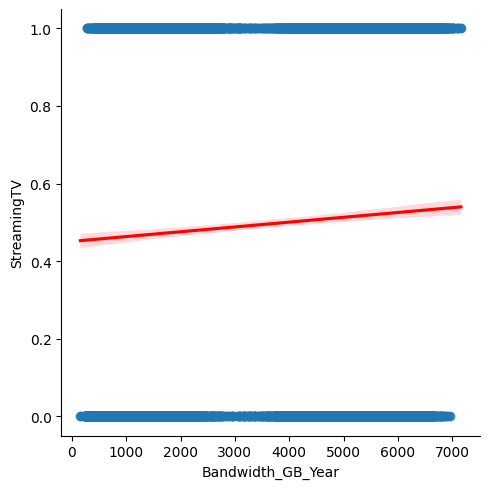

In [192]:
sns.lmplot(  x="Bandwidth_GB_Year", y="StreamingTV", data=MLRdata, line_kws={'color': 'red'}) 

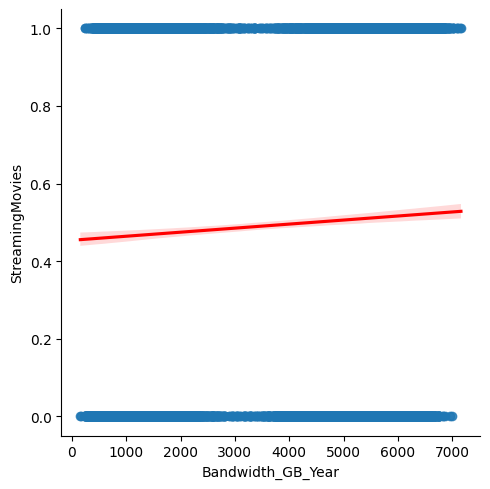

In [193]:
sns.lmplot( x="Bandwidth_GB_Year", y="StreamingMovies", data=MLRdata, line_kws={'color': 'red'})

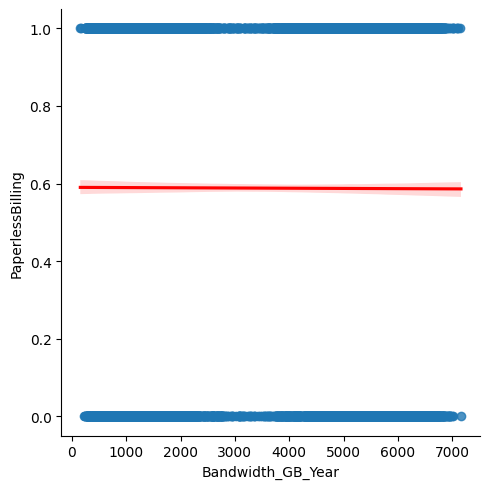

In [194]:
sns.lmplot(  x="Bandwidth_GB_Year", y="PaperlessBilling", data=MLRdata, line_kws={'color': 'red'}) 

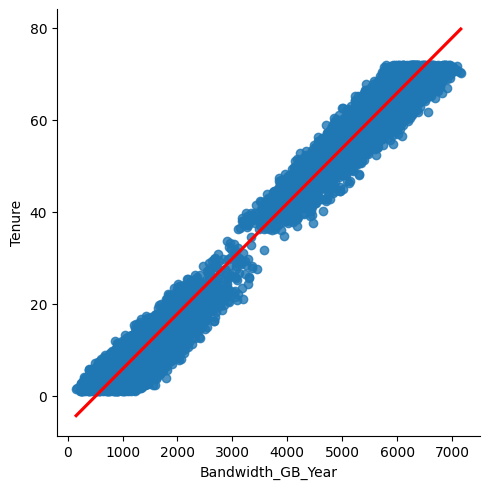

In [195]:
sns.lmplot(  x="Bandwidth_GB_Year", y="Tenure", data=MLRdata, line_kws={'color': 'red'}) 


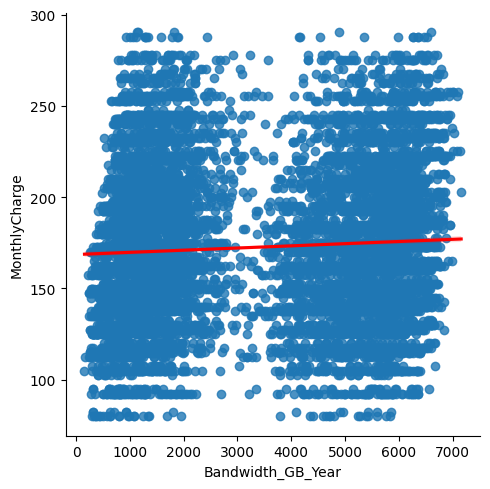

In [196]:
sns.lmplot(  x="Bandwidth_GB_Year", y="MonthlyCharge", data=MLRdata, line_kws={'color': 'red'}) 

# OLS Regression

In [197]:
MLRdata['intercept'] = 1

## Initial model

In [198]:
X1 = sm.OLS(MLRdata['Bandwidth_GB_Year'], MLRdata[['Churn', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone'  , 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure', 'MonthlyCharge', 'intercept']]).fit()


In [199]:
print(X1.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.849e+04
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:10:31   Log-Likelihood:                -68028.
No. Observations:               10000   AIC:                         1.361e+05
Df Residuals:                    9982   BIC:                         1.362e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Churn                   83.5584 

<Axes: >

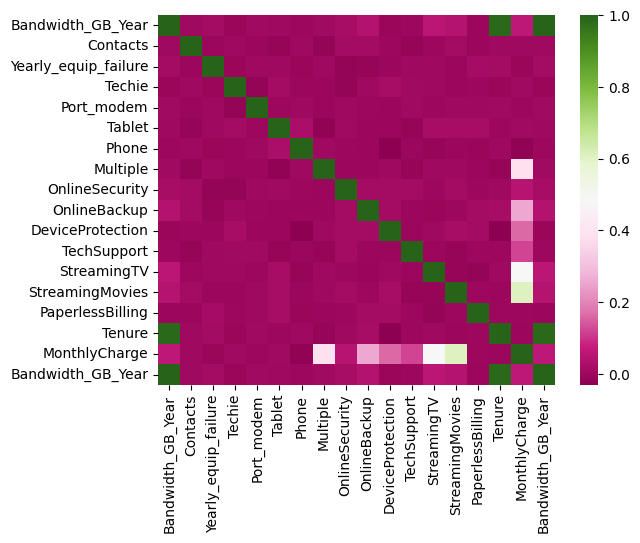

In [200]:
X1data = MLRdata[['Bandwidth_GB_Year', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone'  , 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',  'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
sns.heatmap(X1data.corr(),xticklabels =X1data.corr().columns, cmap='PiYG' )

## Reduced model

In [201]:
X2 = sm.OLS(churndata['Bandwidth_GB_Year'], MLRdata[['Churn' , 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies','Tenure', 'MonthlyCharge', 'intercept']]).fit()
print(X2.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 9.947e+04
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:10:35   Log-Likelihood:                -68029.
No. Observations:               10000   AIC:                         1.361e+05
Df Residuals:                    9989   BIC:                         1.362e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Churn               83.2705      6.355  

<Axes: >

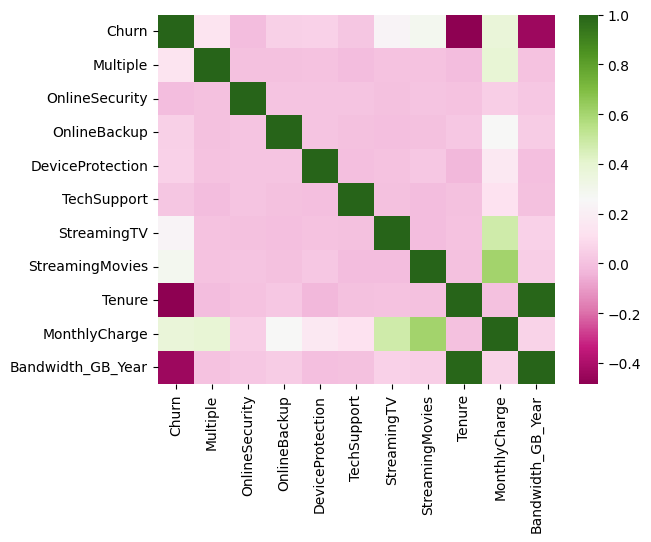

In [202]:
X2data = MLRdata[['Churn' , 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies','Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
sns.heatmap(X2data.corr(),xticklabels =X2data.corr().columns, cmap='PiYG' )
